# Exploratory Data Analysis of Teams dataset

In [501]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

teams = pd.read_csv('basketballPlayoffs/teams.csv', delimiter=",")

teams.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,seeded,firstRound,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
0,9,WNBA,ATL,ATL,EA,NaN,7,N,0,NaN,...,34,1,16,3,14,2,18,6825,141379,Philips Arena
1,10,WNBA,ATL,ATL,EA,NaN,2,Y,0,L,...,34,12,5,6,11,10,12,6950,120737,Philips Arena
2,1,WNBA,CHA,CHA,EA,NaN,8,N,0,NaN,...,32,5,11,3,13,5,16,6475,90963,Charlotte Coliseum
3,2,WNBA,CHA,CHA,EA,NaN,4,Y,0,W,...,32,11,5,7,9,15,6,6500,105525,Charlotte Coliseum
4,3,WNBA,CHA,CHA,EA,NaN,2,Y,0,L,...,32,11,5,7,9,12,9,6450,106670,Charlotte Coliseum


In [502]:
for column in teams.columns:
    unique_values = teams[column].unique()
    print(f"Number of different values in the {column} column are:", len(unique_values))
    print("------------")

Number of different values in the year column are: 10
------------
Number of different values in the lgID column are: 1
------------
Number of different values in the tmID column are: 20
------------
Number of different values in the franchID column are: 18
------------
Number of different values in the confID column are: 2
------------
Number of different values in the divID column are: 1
------------
Number of different values in the rank column are: 8
------------
Number of different values in the playoff column are: 2
------------
Number of different values in the seeded column are: 1
------------
Number of different values in the firstRound column are: 3
------------
Number of different values in the semis column are: 3
------------
Number of different values in the finals column are: 3
------------
Number of different values in the name column are: 20
------------
Number of different values in the o_fgm column are: 116
------------
Number of different values in the o_fga column a

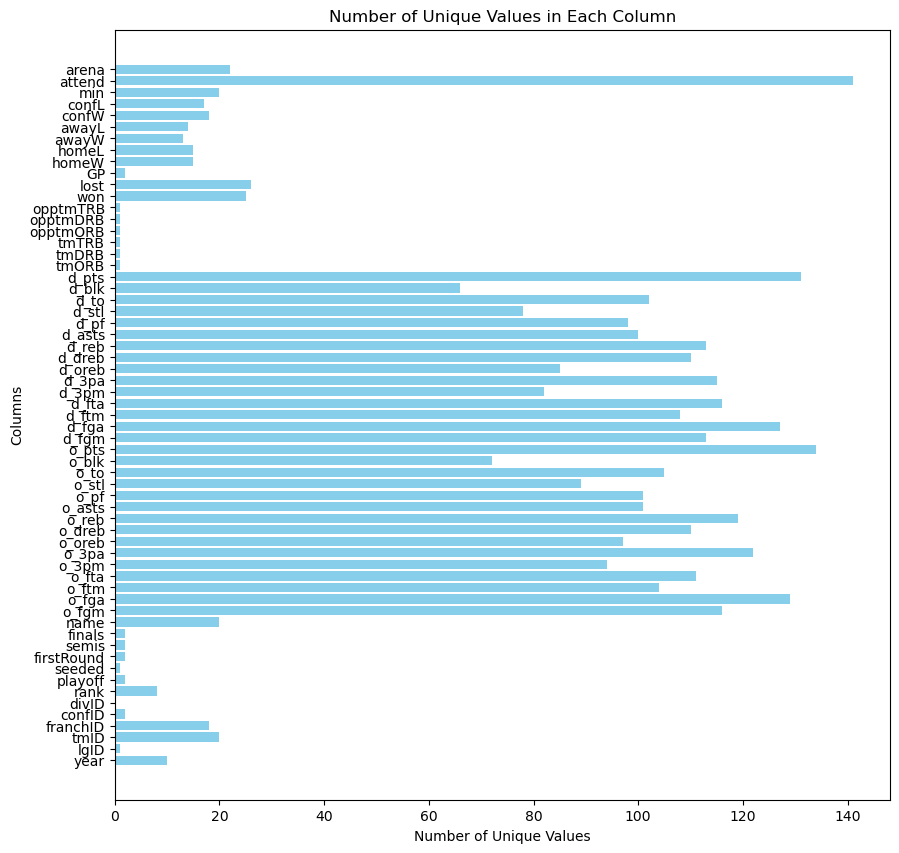

In [503]:
columns = []
value_counts = []

for column in teams.columns:
    unique_values = teams[column].nunique()
    columns.append(column)
    value_counts.append(unique_values)

plt.figure(figsize=(10, 10))
plt.barh(columns, value_counts, color='skyblue')
plt.xlabel('Number of Unique Values')
plt.ylabel('Columns')
plt.title('Number of Unique Values in Each Column')
plt.show()

In [504]:
teams.isnull().sum()

year        0
lgID        0
tmID        0
franchID    0
confID      0
           ..
confW       0
confL       0
min         0
attend      0
arena       0
Length: 61, dtype: int64

In [505]:
print(teams.dtypes)

year         int64
lgID        object
tmID        object
franchID    object
confID      object
             ...  
confW        int64
confL        int64
min          int64
attend       int64
arena       object
Length: 61, dtype: object


In [506]:
for column in teams.columns:
    if teams[column].dtype == 'object':
        teams[column] = teams[column].astype('category').cat.codes

teams.describe()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,seeded,firstRound,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
count,142.000000,142.0,142.000000,142.000000,142.000000,0.0,142.000000,142.000000,142.0,142.00000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,5.302817,0.0,10.070423,9.415493,0.507042,NaN,4.084507,0.563380,0.0,-0.15493,...,33.323944,10.169014,6.492958,6.492958,10.169014,10.563380,10.563380,6735.683099,141050.253521,10.838028
std,2.917274,0.0,5.426031,4.906564,0.501720,NaN,2.095226,0.497722,0.0,0.83620,...,0.949425,2.994017,2.967308,2.702104,2.731409,3.485461,3.485461,197.851093,34714.358519,6.565153
min,1.000000,0.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.0,-1.00000,...,32.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,6400.000000,57635.000000,0.000000
25%,3.000000,0.0,6.000000,5.000000,0.000000,NaN,2.000000,0.000000,0.0,-1.00000,...,32.000000,8.000000,4.250000,5.000000,9.000000,8.000000,8.000000,6500.000000,120897.500000,6.000000
50%,5.000000,0.0,10.000000,10.000000,1.000000,NaN,4.000000,1.000000,0.0,0.00000,...,34.000000,11.000000,6.000000,6.000000,10.000000,11.000000,10.000000,6825.000000,135895.500000,10.000000
75%,8.000000,0.0,15.000000,14.000000,1.000000,NaN,6.000000,1.000000,0.0,1.00000,...,34.000000,12.000000,8.000000,8.000000,12.000000,13.000000,13.000000,6875.000000,150441.500000,16.000000
max,10.000000,0.0,19.000000,17.000000,1.000000,NaN,8.000000,1.000000,0.0,1.00000,...,34.000000,16.000000,16.000000,13.000000,16.000000,19.000000,19.000000,7025.000000,259237.000000,21.000000


In [507]:
def correlation_matrix(dataframe):
    corr_matrix = dataframe.corr()

    target_correlation = corr_matrix['playoff']

    plt.figure(figsize=(30, 20))

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidths=0.5, fmt=".2f")

    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

    dict = {}

    for feature, correlation in target_correlation.items():
        print(f"Correlation between target and {feature}: {correlation}")
        dict[feature] = correlation

    return dict

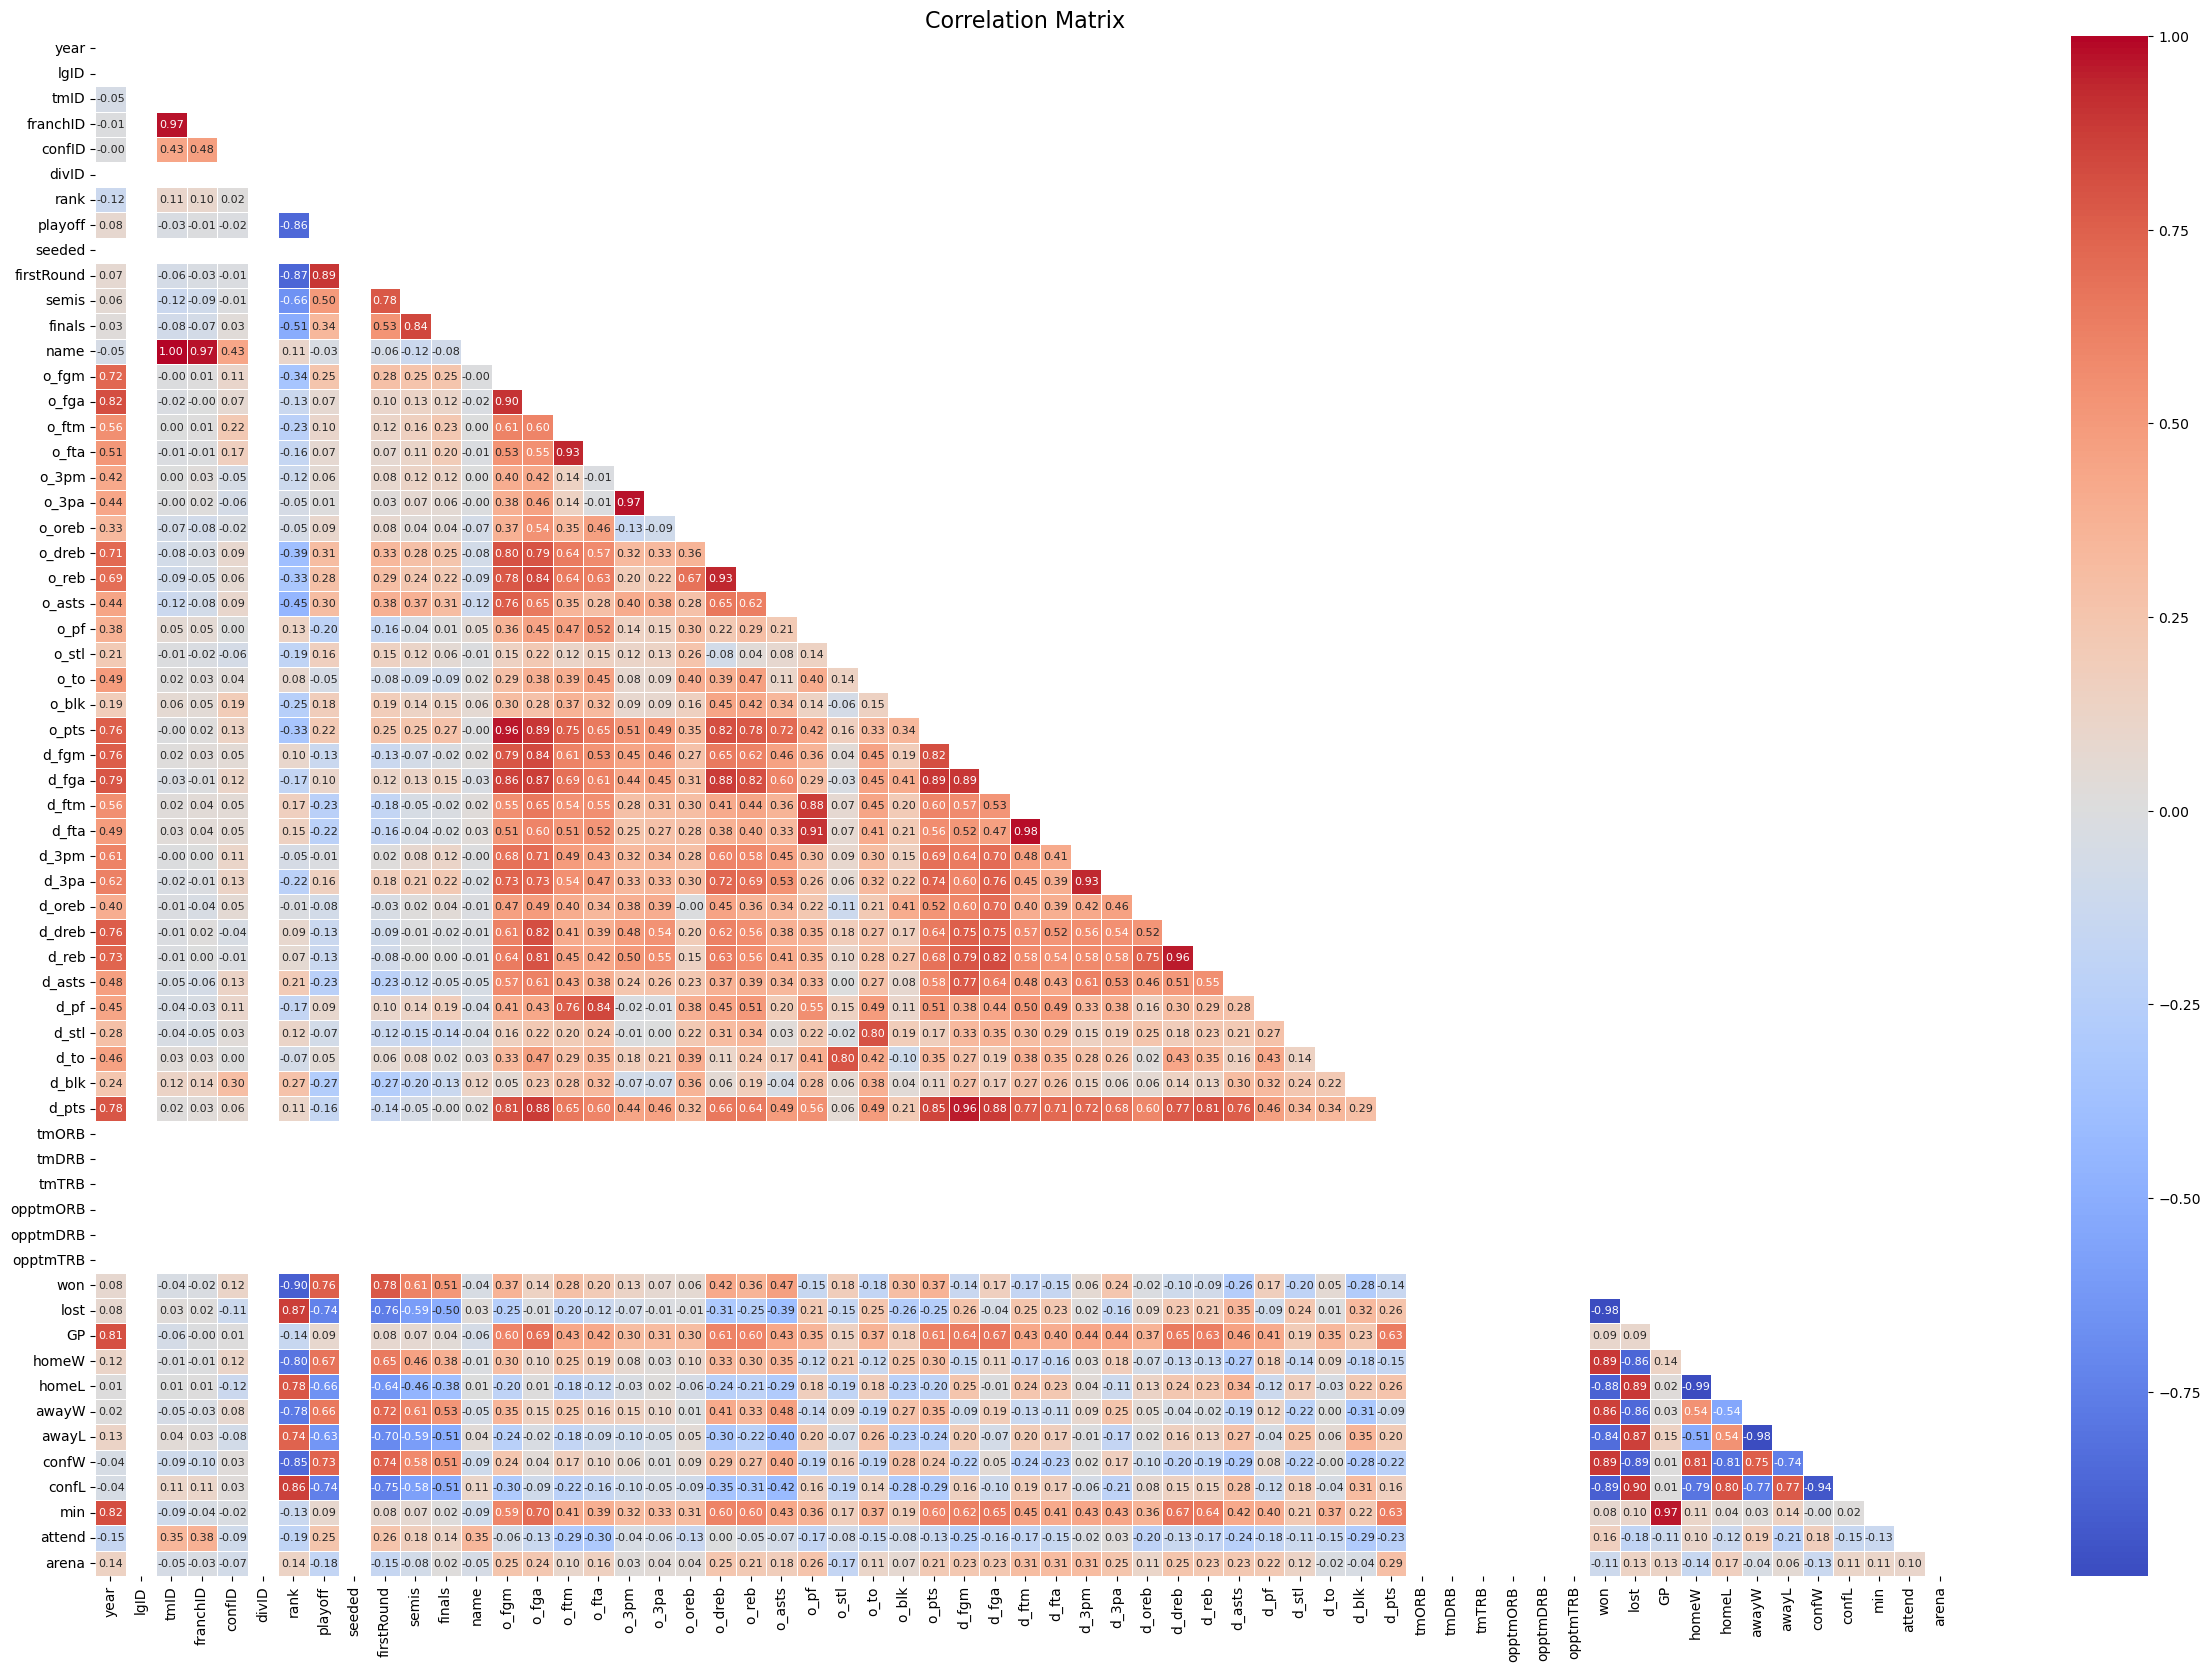

Correlation between target and year: 0.07705063246068848
Correlation between target and lgID: nan
Correlation between target and tmID: -0.02529934329892212
Correlation between target and franchID: -0.0065036191928241486
Correlation between target and confID: -0.016000512024577127
Correlation between target and divID: nan
Correlation between target and rank: -0.8620790896686981
Correlation between target and playoff: 1.0
Correlation between target and seeded: nan
Correlation between target and firstRound: 0.892828570971414
Correlation between target and semis: 0.4970630193302927
Correlation between target and finals: 0.336817912482514
Correlation between target and name: -0.02529934329892215
Correlation between target and o_fgm: 0.2515792808650922
Correlation between target and o_fga: 0.07084000425330679
Correlation between target and o_ftm: 0.1047223173119909
Correlation between target and o_fta: 0.0724933405057681
Correlation between target and o_3pm: 0.060612269288855054
Correlation 

{'year': 0.07705063246068848,
 'lgID': nan,
 'tmID': -0.02529934329892212,
 'franchID': -0.0065036191928241486,
 'confID': -0.016000512024577127,
 'divID': nan,
 'rank': -0.8620790896686981,
 'playoff': 1.0,
 'seeded': nan,
 'firstRound': 0.892828570971414,
 'semis': 0.4970630193302927,
 'finals': 0.336817912482514,
 'name': -0.02529934329892215,
 'o_fgm': 0.2515792808650922,
 'o_fga': 0.07084000425330679,
 'o_ftm': 0.1047223173119909,
 'o_fta': 0.0724933405057681,
 'o_3pm': 0.060612269288855054,
 'o_3pa': 0.007957559282677005,
 'o_oreb': 0.0923630258772151,
 'o_dreb': 0.30755716728105326,
 'o_reb': 0.2794116621840806,
 'o_asts': 0.3032475605334074,
 'o_pf': -0.2029192427184587,
 'o_stl': 0.1648824091126278,
 'o_to': -0.051552794336507696,
 'o_blk': 0.17871539023127894,
 'o_pts': 0.2213991839184398,
 'd_fgm': -0.1300557721536696,
 'd_fga': 0.10293846565632093,
 'd_ftm': -0.23395831262583386,
 'd_fta': -0.2196777440462202,
 'd_3pm': -0.00932954576569799,
 'd_3pa': 0.15591906469556485,
 

In [508]:
correlation_matrix(teams)

As we can see, features related to the playoffs are heavily related to whether the team made it to playoffs or not (as expected).  
Some features have no correlation, so they can be eliminated ('lgID', 'divID', 'seeded', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB')  
Some others like 'name', ' tmID' and 'franchID' are highly related to each other, which means we can delete and leave just one of them. 

In [509]:
teams = teams.drop(columns=['name', 'franchID'])

We can start by reducing the number of feature a team has and make them better features for evaluation, like Points-per-Game for example.

In [510]:
# offensive stats
offensiveFieldGoalPercentageMax = 0
offensiveFieldGoalPercentageMin = 100

offensiveFreeThrowPercentageMax = 0
offensiveFreeThrowPercentageMin = 100

offensiveThreePointPercentageMax = 0
offensiveThreePointPercentageMin = 100

offensiveReboundsPerGameMax = 0
offensiveReboundsPerGameMin = 999

offensiveAssistsPerGameMax = 0
offensiveAssistsPerGameMin = 999

offensivePersonalFoulsPerGameMax = 0
offensivePersonalFoulsPerGameMin = 999

offensiveStealsPerGameMax = 0
offensiveStealsPerGameMin = 999

offensiveTurnoversPerGameMax = 0
offensiveTurnoversPerGameMin = 999

offensiveBlocksPerGameMax = 0
offensiveBlocksPerGameMin = 999

offensivePointsPerGameMax = 0
offensivePointsPerGameMin = 999

In [511]:
# defensive stats
defensiveFieldGoalPercentageMax = 0
defensiveFieldGoalPercentageMin = 100

defensiveFreeThrowPercentageMax = 0
defensiveFreeThrowPercentageMin = 100

defensiveThreePointPercentageMax = 0
defensiveThreePointPercentageMin = 100

defensiveReboundsPerGameMax = 0
defensiveReboundsPerGameMin = 999

defensiveAssistsPerGameMax = 0
defensiveAssistsPerGameMin = 999

defensivePersonalFoulsPerGameMax = 0
defensivePersonalFoulsPerGameMin = 999

defensiveStealsPerGameMax = 0
defensiveStealsPerGameMin = 999

defensiveTurnoversPerGameMax = 0
defensiveTurnoversPerGameMin = 999

defensiveBlocksPerGameMax = 0
defensiveBlocksPerGameMin = 999

defensivePointsPerGameMax = 0
defensivePointsPerGameMin = 999

In [512]:
# global stats
winPercentageMax = 0
winPercentageMin = 100

homeWinPercentageMax = 0
homeWinPercentageMin = 100

awayWinPercentageMax = 0
awayWinPercentageMin = 100

conferenceWinPercentageMax = 0
conferenceWinPercentageMin = 100

attendanceMax = 0
attendanceMin = 9999999

In [513]:
for index, row in teams.iterrows():
    # offensive stats
    offensiveFieldGoalPercentage = (row['o_fgm'] / row['o_fga']) * 100

    if(offensiveFieldGoalPercentage > offensiveFieldGoalPercentageMax):
        offensiveFieldGoalPercentageMax = offensiveFieldGoalPercentage
    if(offensiveFieldGoalPercentage < offensiveFieldGoalPercentageMin):
        offensiveFieldGoalPercentageMin = offensiveFieldGoalPercentage

    offensiveFreeThrowPercentage = (row['o_ftm'] / row['o_fta']) * 100

    if(offensiveFreeThrowPercentage > offensiveFreeThrowPercentageMax):
        offensiveFreeThrowPercentageMax = offensiveFreeThrowPercentage
    if(offensiveFreeThrowPercentage < offensiveFreeThrowPercentageMin):
        offensiveFreeThrowPercentageMin = offensiveFreeThrowPercentage

    offensiveThreePointPercentage = (row['o_3pm'] / row['o_3pa']) * 100

    if(offensiveThreePointPercentage > offensiveThreePointPercentageMax):
        offensiveThreePointPercentageMax = offensiveThreePointPercentage
    if(offensiveThreePointPercentage < offensiveThreePointPercentageMin):
        offensiveThreePointPercentageMin = offensiveThreePointPercentage

    offensiveReboundsPerGame = row['o_reb'] / row['GP']

    if(offensiveReboundsPerGame > offensiveReboundsPerGameMax):
        offensiveReboundsPerGameMax = offensiveReboundsPerGame
    if(offensiveReboundsPerGame < offensiveReboundsPerGameMin):
        offensiveReboundsPerGameMin = offensiveReboundsPerGame

    offensiveAssistsPerGame = row['o_asts'] / row['GP']

    if(offensiveAssistsPerGame > offensiveAssistsPerGameMax):
        offensiveAssistsPerGameMax = offensiveAssistsPerGame
    if(offensiveAssistsPerGame < offensiveAssistsPerGameMin):
        offensiveAssistsPerGameMin = offensiveAssistsPerGame

    offensivePersonalFoulsPerGame = row['o_pf'] / row['GP']

    if(offensivePersonalFoulsPerGame > offensivePersonalFoulsPerGameMax):
        offensivePersonalFoulsPerGameMax = offensivePersonalFoulsPerGame
    if(offensivePersonalFoulsPerGame < offensivePersonalFoulsPerGameMin):
        offensivePersonalFoulsPerGameMin = offensivePersonalFoulsPerGame

    offensiveStealsPerGame = row['o_stl'] / row['GP']

    if(offensiveStealsPerGame > offensiveStealsPerGameMax):
        offensiveStealsPerGameMax = offensiveStealsPerGame
    if(offensiveStealsPerGame < offensiveStealsPerGameMin):
        offensiveStealsPerGameMin = offensiveStealsPerGame

    offensiveTurnoversPerGame = row['o_to'] / row['GP']

    if(offensiveTurnoversPerGame > offensiveTurnoversPerGameMax):
        offensiveTurnoversPerGameMax = offensiveTurnoversPerGame
    if(offensiveTurnoversPerGame < offensiveTurnoversPerGameMin):
        offensiveTurnoversPerGameMin = offensiveTurnoversPerGame

    offensiveBlocksPerGame = row['o_blk'] / row['GP']

    if(offensiveBlocksPerGame > offensiveBlocksPerGameMax):
        offensiveBlocksPerGameMax = offensiveBlocksPerGame
    if(offensiveBlocksPerGame < offensiveBlocksPerGameMin):
        offensiveBlocksPerGameMin = offensiveBlocksPerGame

    offensivePointsPerGame = row['o_pts'] / row['GP']

    if(offensivePointsPerGame > offensivePointsPerGameMax):
        offensivePointsPerGameMax = offensivePointsPerGame
    if(offensivePointsPerGame < offensivePointsPerGameMin):
        offensivePointsPerGameMin = offensivePointsPerGame

    # defensive stats
    defensiveFieldGoalPercentage = (row['d_fgm'] / row['d_fga']) * 100

    if(defensiveFieldGoalPercentage > defensiveFieldGoalPercentageMax):
        defensiveFieldGoalPercentageMax = defensiveFieldGoalPercentage
    if(defensiveFieldGoalPercentage < defensiveFieldGoalPercentageMin):
        defensiveFieldGoalPercentageMin = defensiveFieldGoalPercentage

    defensiveFreeThrowPercentage = (row['d_ftm'] / row['d_fta']) * 100

    if(defensiveFreeThrowPercentage > defensiveFreeThrowPercentageMax):
        defensiveFreeThrowPercentageMax = defensiveFreeThrowPercentage
    if(defensiveFreeThrowPercentage < defensiveFreeThrowPercentageMin):
        defensiveFreeThrowPercentageMin = defensiveFreeThrowPercentage

    defensiveThreePointPercentage = (row['d_3pm'] / row['d_3pa']) * 100

    if(defensiveThreePointPercentage > defensiveThreePointPercentageMax):
        defensiveThreePointPercentageMax = defensiveThreePointPercentage
    if(defensiveThreePointPercentage < defensiveThreePointPercentageMin):
        defensiveThreePointPercentageMin = defensiveThreePointPercentage

    defensiveReboundsPerGame = row['d_reb'] / row['GP']

    if(defensiveReboundsPerGame > defensiveReboundsPerGameMax):
        defensiveReboundsPerGameMax = defensiveReboundsPerGame
    if(defensiveReboundsPerGame < defensiveReboundsPerGameMin):
        defensiveReboundsPerGameMin = defensiveReboundsPerGame

    defensiveAssistsPerGame = row['d_asts'] / row['GP']

    if(defensiveAssistsPerGame > defensiveAssistsPerGameMax):
        defensiveAssistsPerGameMax = defensiveAssistsPerGame
    if(defensiveAssistsPerGame < defensiveAssistsPerGameMin):
        defensiveAssistsPerGameMin = defensiveAssistsPerGame

    defensivePersonalFoulsPerGame = row['d_pf'] / row['GP']

    if(defensivePersonalFoulsPerGame > defensivePersonalFoulsPerGameMax):
        defensivePersonalFoulsPerGameMax = defensivePersonalFoulsPerGame
    if(defensivePersonalFoulsPerGame < defensivePersonalFoulsPerGameMin):
        defensivePersonalFoulsPerGameMin = defensivePersonalFoulsPerGame

    defensiveStealsPerGame = row['d_stl'] / row['GP']

    if(defensiveStealsPerGame > defensiveStealsPerGameMax):
        defensiveStealsPerGameMax = defensiveStealsPerGame
    if(defensiveStealsPerGame < defensiveStealsPerGameMin):
        defensiveStealsPerGameMin = defensiveStealsPerGame

    defensiveTurnoversPerGame = row['d_to'] / row['GP']

    if(defensiveTurnoversPerGame > defensiveTurnoversPerGameMax):
        defensiveTurnoversPerGameMax = defensiveTurnoversPerGame
    if(defensiveTurnoversPerGame < defensiveTurnoversPerGameMin):
        defensiveTurnoversPerGameMin = defensiveTurnoversPerGame

    defensiveBlocksPerGame = row['d_blk'] / row['GP']

    if(defensiveBlocksPerGame > defensiveBlocksPerGameMax):
        defensiveBlocksPerGameMax = defensiveBlocksPerGame
    if(defensiveBlocksPerGame < defensiveBlocksPerGameMin):
        defensiveBlocksPerGameMin = defensiveBlocksPerGame

    defensivePointsPerGame = row['d_pts'] / row['GP']

    if(defensivePointsPerGame > defensivePointsPerGameMax):
        defensivePointsPerGameMax = defensivePointsPerGame
    if(defensivePointsPerGame < defensivePointsPerGameMin):
        defensivePointsPerGameMin = defensivePointsPerGame

    winPercentage = row['won'] / row['GP'] * 100

    if(winPercentage > winPercentageMax):
        winPercentageMax = winPercentage
    if(winPercentage < winPercentageMin):
        winPercentageMin = winPercentage

    homeWinPercentage = row['homeW'] / (row['homeW'] + row['homeL']) * 100

    if(homeWinPercentage > homeWinPercentageMax):
        homeWinPercentageMax = homeWinPercentage    
    if(homeWinPercentage < homeWinPercentageMin):
        homeWinPercentageMin = homeWinPercentage

    awayWinPercentage = row['awayW'] / (row['awayW'] + row['awayL']) * 100

    if(awayWinPercentage > awayWinPercentageMax):
        awayWinPercentageMax = awayWinPercentage
    if(awayWinPercentage < awayWinPercentageMin):
        awayWinPercentageMin = awayWinPercentage

    conferenceWinPercentage = row['confW'] / (row['confW'] + row['confL']) * 100

    if(conferenceWinPercentage > conferenceWinPercentageMax):
        conferenceWinPercentageMax = conferenceWinPercentage
    if(conferenceWinPercentage < conferenceWinPercentageMin):
        conferenceWinPercentageMin = conferenceWinPercentage

    if(row['attend'] > attendanceMax):
        attendanceMax = row['attend']
    if(row['attend'] < attendanceMin):
        attendanceMin = row['attend']

In [514]:
print("offensiveFieldGoalPercentageMax: ", offensiveFieldGoalPercentageMax)
print("offensiveFieldGoalPercentageMin: ", offensiveFieldGoalPercentageMin)
print("offensiveFreeThrowPercentageMax: ", offensiveFreeThrowPercentageMax)
print("offensiveFreeThrowPercentageMin: ", offensiveFreeThrowPercentageMin)
print("offensiveThreePointPercentageMax: ", offensiveThreePointPercentageMax)
print("offensiveThreePointPercentageMin: ", offensiveThreePointPercentageMin)
print("offensiveReboundsPerGameMax: ", offensiveReboundsPerGameMax)
print("offensiveReboundsPerGameMin: ", offensiveReboundsPerGameMin)
print("offensiveAssistsPerGameMax: ", offensiveAssistsPerGameMax)
print("offensiveAssistsPerGameMin: ", offensiveAssistsPerGameMin)
print("offensivePersonalFoulsPerGameMax: ", offensivePersonalFoulsPerGameMax)
print("offensivePersonalFoulsPerGameMin: ", offensivePersonalFoulsPerGameMin)
print("offensiveStealsPerGameMax: ", offensiveStealsPerGameMax)
print("offensiveStealsPerGameMin: ", offensiveStealsPerGameMin)
print("offensiveTurnoversPerGameMax: ", offensiveTurnoversPerGameMax)
print("offensiveTurnoversPerGameMin: ", offensiveTurnoversPerGameMin)
print("offensiveBlocksPerGameMax: ", offensiveBlocksPerGameMax)
print("offensiveBlocksPerGameMin: ", offensiveBlocksPerGameMin)
print("offensivePointsPerGameMax: ", offensivePointsPerGameMax)
print("offensivePointsPerGameMin: ", offensivePointsPerGameMin)

offensiveFieldGoalPercentageMax:  47.04329461457233
offensiveFieldGoalPercentageMin:  36.471251409244644
offensiveFreeThrowPercentageMax:  85.50531914893617
offensiveFreeThrowPercentageMin:  65.76227390180878
offensiveThreePointPercentageMax:  40.03795066413662
offensiveThreePointPercentageMin:  27.419354838709676
offensiveReboundsPerGameMax:  38.55882352941177
offensiveReboundsPerGameMin:  24.78125
offensiveAssistsPerGameMax:  20.08823529411765
offensiveAssistsPerGameMin:  12.1875
offensivePersonalFoulsPerGameMax:  23.78125
offensivePersonalFoulsPerGameMin:  14.411764705882353
offensiveStealsPerGameMax:  10.970588235294118
offensiveStealsPerGameMin:  5.5
offensiveTurnoversPerGameMax:  18.735294117647058
offensiveTurnoversPerGameMin:  12.470588235294118
offensiveBlocksPerGameMax:  6.352941176470588
offensiveBlocksPerGameMin:  1.96875
offensivePointsPerGameMax:  92.82352941176471
offensivePointsPerGameMin:  56.9375


In [515]:
print("defensiveFieldGoalPercentageMax: ", defensiveFieldGoalPercentageMax)
print("defensiveFieldGoalPercentageMin: ", defensiveFieldGoalPercentageMin)
print("defensiveFreeThrowPercentageMax: ", defensiveFreeThrowPercentageMax)
print("defensiveFreeThrowPercentageMin: ", defensiveFreeThrowPercentageMin)
print("defensiveThreePointPercentageMax: ", defensiveThreePointPercentageMax)
print("defensiveThreePointPercentageMin: ", defensiveThreePointPercentageMin)
print("defensiveReboundsPerGameMax: ", defensiveReboundsPerGameMax)
print("defensiveReboundsPerGameMin: ", defensiveReboundsPerGameMin)
print("defensiveAssistsPerGameMax: ", defensiveAssistsPerGameMax)
print("defensiveAssistsPerGameMin: ", defensiveAssistsPerGameMin)
print("defensivePersonalFoulsPerGameMax: ", defensivePersonalFoulsPerGameMax)
print("defensivePersonalFoulsPerGameMin: ", defensivePersonalFoulsPerGameMin)
print("defensiveStealsPerGameMax: ", defensiveStealsPerGameMax)
print("defensiveStealsPerGameMin: ", defensiveStealsPerGameMin)
print("defensiveTurnoversPerGameMax: ", defensiveTurnoversPerGameMax)
print("defensiveTurnoversPerGameMin: ", defensiveTurnoversPerGameMin)
print("defensiveBlocksPerGameMax: ", defensiveBlocksPerGameMax)
print("defensiveBlocksPerGameMin: ", defensiveBlocksPerGameMin)
print("defensivePointsPerGameMax: ", defensivePointsPerGameMax)
print("defensivePointsPerGameMin: ", defensivePointsPerGameMin)

defensiveFieldGoalPercentageMax:  46.16222101252042
defensiveFieldGoalPercentageMin:  37.5
defensiveFreeThrowPercentageMax:  81.74061433447099
defensiveFreeThrowPercentageMin:  68.82882882882882
defensiveThreePointPercentageMax:  39.948453608247426
defensiveThreePointPercentageMin:  27.61904761904762
defensiveReboundsPerGameMax:  40.88235294117647
defensiveReboundsPerGameMin:  27.28125
defensiveAssistsPerGameMax:  20.11764705882353
defensiveAssistsPerGameMin:  12.125
defensivePersonalFoulsPerGameMax:  22.88235294117647
defensivePersonalFoulsPerGameMin:  16.61764705882353
defensiveStealsPerGameMax:  10.205882352941176
defensiveStealsPerGameMin:  5.794117647058823
defensiveTurnoversPerGameMax:  19.08823529411765
defensiveTurnoversPerGameMin:  12.088235294117647
defensiveBlocksPerGameMax:  6.0588235294117645
defensiveBlocksPerGameMin:  2.21875
defensivePointsPerGameMax:  89.1470588235294
defensivePointsPerGameMin:  55.875


In [516]:
# global stats
print("winPercentageMax: ", winPercentageMax)
print("winPercentageMin: ", winPercentageMin)
print("homeWinPercentageMax: ", homeWinPercentageMax)
print("homeWinPercentageMin: ", homeWinPercentageMin)
print("awayWinPercentageMax: ", awayWinPercentageMax)
print("awayWinPercentageMin: ", awayWinPercentageMin)
print("conferenceWinPercentageMax: ", conferenceWinPercentageMax)
print("conferenceWinPercentageMin: ", conferenceWinPercentageMin)
print("attendanceMax: ", attendanceMax)
print("attendanceMin: ", attendanceMin)

winPercentageMax:  87.5
winPercentageMin:  11.76470588235294
homeWinPercentageMax:  100.0
homeWinPercentageMin:  5.88235294117647
awayWinPercentageMax:  81.25
awayWinPercentageMin:  5.88235294117647
conferenceWinPercentageMax:  90.47619047619048
conferenceWinPercentageMin:  10.0
attendanceMax:  259237.0
attendanceMin:  57635.0


In [517]:
def team_power_ranking(team): 

    # offensive stats
    offensiveFieldGoalPercentage = (team['o_fgm'] / team['o_fga']) * 100
    offensiveFieldGoalPercentage = (offensiveFieldGoalPercentage - offensiveFieldGoalPercentageMin) / (offensiveFieldGoalPercentageMax - offensiveFieldGoalPercentageMin) * 100

    offensiveFreeThrowPercentage = (team['o_ftm'] / team['o_fta']) * 100
    offensiveFreeThrowPercentage = (offensiveFreeThrowPercentage - offensiveFreeThrowPercentageMin) / (offensiveFreeThrowPercentageMax - offensiveFreeThrowPercentageMin) * 100

    offensiveThreePointPercentage = (team['o_3pm'] / team['o_3pa']) * 100
    offensiveThreePointPercentage = (offensiveThreePointPercentage - offensiveThreePointPercentageMin) / (offensiveThreePointPercentageMax - offensiveThreePointPercentageMin) * 100

    offensiveReboundsPerGame = team['o_reb'] / team['GP']
    offensiveReboundsPerGame = (offensiveReboundsPerGame - offensiveReboundsPerGameMin) / (offensiveReboundsPerGameMax - offensiveReboundsPerGameMin) * 100

    offensiveAssistsPerGame = team['o_asts'] / team['GP']
    offensiveAssistsPerGame = (offensiveAssistsPerGame - offensiveAssistsPerGameMin) / (offensiveAssistsPerGameMax - offensiveAssistsPerGameMin) * 100

    offensivePersonalFoulsPerGame = team['o_pf'] / team['GP']
    offensivePersonalFoulsPerGame = (offensivePersonalFoulsPerGame - offensivePersonalFoulsPerGameMin) / (offensivePersonalFoulsPerGameMax - offensivePersonalFoulsPerGameMin) * 100

    offensiveStealsPerGame = team['o_stl'] / team['GP']
    offensiveStealsPerGame = (offensiveStealsPerGame - offensiveStealsPerGameMin) / (offensiveStealsPerGameMax - offensiveStealsPerGameMin) * 100

    offensiveTurnoversPerGame = team['o_to'] / team['GP']
    offensiveTurnoversPerGame = (offensiveTurnoversPerGame - offensiveTurnoversPerGameMin) / (offensiveTurnoversPerGameMax - offensiveTurnoversPerGameMin) * 100

    offensiveBlocksPerGame = team['o_blk'] / team['GP']
    offensiveBlocksPerGame = (offensiveBlocksPerGame - offensiveBlocksPerGameMin) / (offensiveBlocksPerGameMax - offensiveBlocksPerGameMin) * 100

    offensivePointsPerGame = team['o_pts'] / team['GP']
    offensivePointsPerGame = (offensivePointsPerGame - offensivePointsPerGameMin) / (offensivePointsPerGameMax - offensivePointsPerGameMin) * 100

    # defensive stats
    defensiveFieldGoalPercentage = (team['d_fgm'] / team['d_fga']) * 100
    defensiveFieldGoalPercentage = (defensiveFieldGoalPercentage - defensiveFieldGoalPercentageMin) / (defensiveFieldGoalPercentageMax - defensiveFieldGoalPercentageMin) * 100

    defensiveFreeThrowPercentage = (team['d_ftm'] / team['d_fta']) * 100
    defensiveFreeThrowPercentage = (defensiveFreeThrowPercentage - defensiveFreeThrowPercentageMin) / (defensiveFreeThrowPercentageMax - defensiveFreeThrowPercentageMin) * 100

    defensiveThreePointPercentage = (team['d_3pm'] / team['d_3pa']) * 100
    defensiveThreePointPercentage = (defensiveThreePointPercentage - defensiveThreePointPercentageMin) / (defensiveThreePointPercentageMax - defensiveThreePointPercentageMin) * 100

    defensiveReboundsPerGame = team['d_reb'] / team['GP']
    defensiveReboundsPerGame = (defensiveReboundsPerGame - defensiveReboundsPerGameMin) / (defensiveReboundsPerGameMax - defensiveReboundsPerGameMin) * 100

    defensiveAssistsPerGame = team['d_asts'] / team['GP']
    defensiveAssistsPerGame = (defensiveAssistsPerGame - defensiveAssistsPerGameMin) / (defensiveAssistsPerGameMax - defensiveAssistsPerGameMin) * 100

    defensivePersonalFoulsPerGame = team['d_pf'] / team['GP']
    defensivePersonalFoulsPerGame = (defensivePersonalFoulsPerGame - defensivePersonalFoulsPerGameMin) / (defensivePersonalFoulsPerGameMax - defensivePersonalFoulsPerGameMin) * 100

    defensiveStealsPerGame = team['d_stl'] / team['GP']
    defensiveStealsPerGame = (defensiveStealsPerGame - defensiveStealsPerGameMin) / (defensiveStealsPerGameMax - defensiveStealsPerGameMin) * 100

    defensiveTurnoversPerGame = team['d_to'] / team['GP']
    defensiveTurnoversPerGame = (defensiveTurnoversPerGame - defensiveTurnoversPerGameMin) / (defensiveTurnoversPerGameMax - defensiveTurnoversPerGameMin) * 100

    defensiveBlocksPerGame = team['d_blk'] / team['GP']
    defensiveBlocksPerGame = (defensiveBlocksPerGame - defensiveBlocksPerGameMin) / (defensiveBlocksPerGameMax - defensiveBlocksPerGameMin) * 100

    defensivePointsPerGame = team['d_pts'] / team['GP']
    defensivePointsPerGame = (defensivePointsPerGame - defensivePointsPerGameMin) / (defensivePointsPerGameMax - defensivePointsPerGameMin) * 100

    # global stats
    winPercentage = team['won'] / team['GP'] * 100
    winPercentage = (winPercentage - winPercentageMin) / (winPercentageMax - winPercentageMin) * 100

    homeWinPercentage = team['homeW'] / (team['homeW'] + team['homeL']) * 100
    homeWinPercentage = (homeWinPercentage - homeWinPercentageMin) / (homeWinPercentageMax - homeWinPercentageMin) * 100

    awayWinPercentage = team['awayW'] / (team['awayW'] + team['awayL']) * 100
    awayWinPercentage = (awayWinPercentage - awayWinPercentageMin) / (awayWinPercentageMax - awayWinPercentageMin) * 100

    conferenceWinPercentage = team['confW'] / (team['confW'] + team['confL']) * 100
    conferenceWinPercentage = (conferenceWinPercentage - conferenceWinPercentageMin) / (conferenceWinPercentageMax - conferenceWinPercentageMin) * 100

    attendance = (team['attend'] - attendanceMin) / (attendanceMax - attendanceMin) * 100

    relevantFeatures = [ offensiveFieldGoalPercentage, offensiveFreeThrowPercentage, offensiveThreePointPercentage, offensiveReboundsPerGame, offensiveAssistsPerGame, 
                        offensivePersonalFoulsPerGame, offensiveStealsPerGame, offensiveTurnoversPerGame, offensiveBlocksPerGame, offensivePointsPerGame, 
                        defensiveFieldGoalPercentage, defensiveFreeThrowPercentage, defensiveThreePointPercentage, defensiveReboundsPerGame, defensiveAssistsPerGame, 
                        defensivePersonalFoulsPerGame, defensiveStealsPerGame, defensiveTurnoversPerGame, defensiveBlocksPerGame, defensivePointsPerGame, winPercentage, 
                        homeWinPercentage, awayWinPercentage, conferenceWinPercentage, attendance ]
    
    powerRankingAcummulator = 0
    numberOfFeatures = len(relevantFeatures)
    averageFeatureWeight = 1 / numberOfFeatures

    for feature in relevantFeatures:
        powerRankingAcummulator += feature * averageFeatureWeight

    return [powerRankingAcummulator] + relevantFeatures

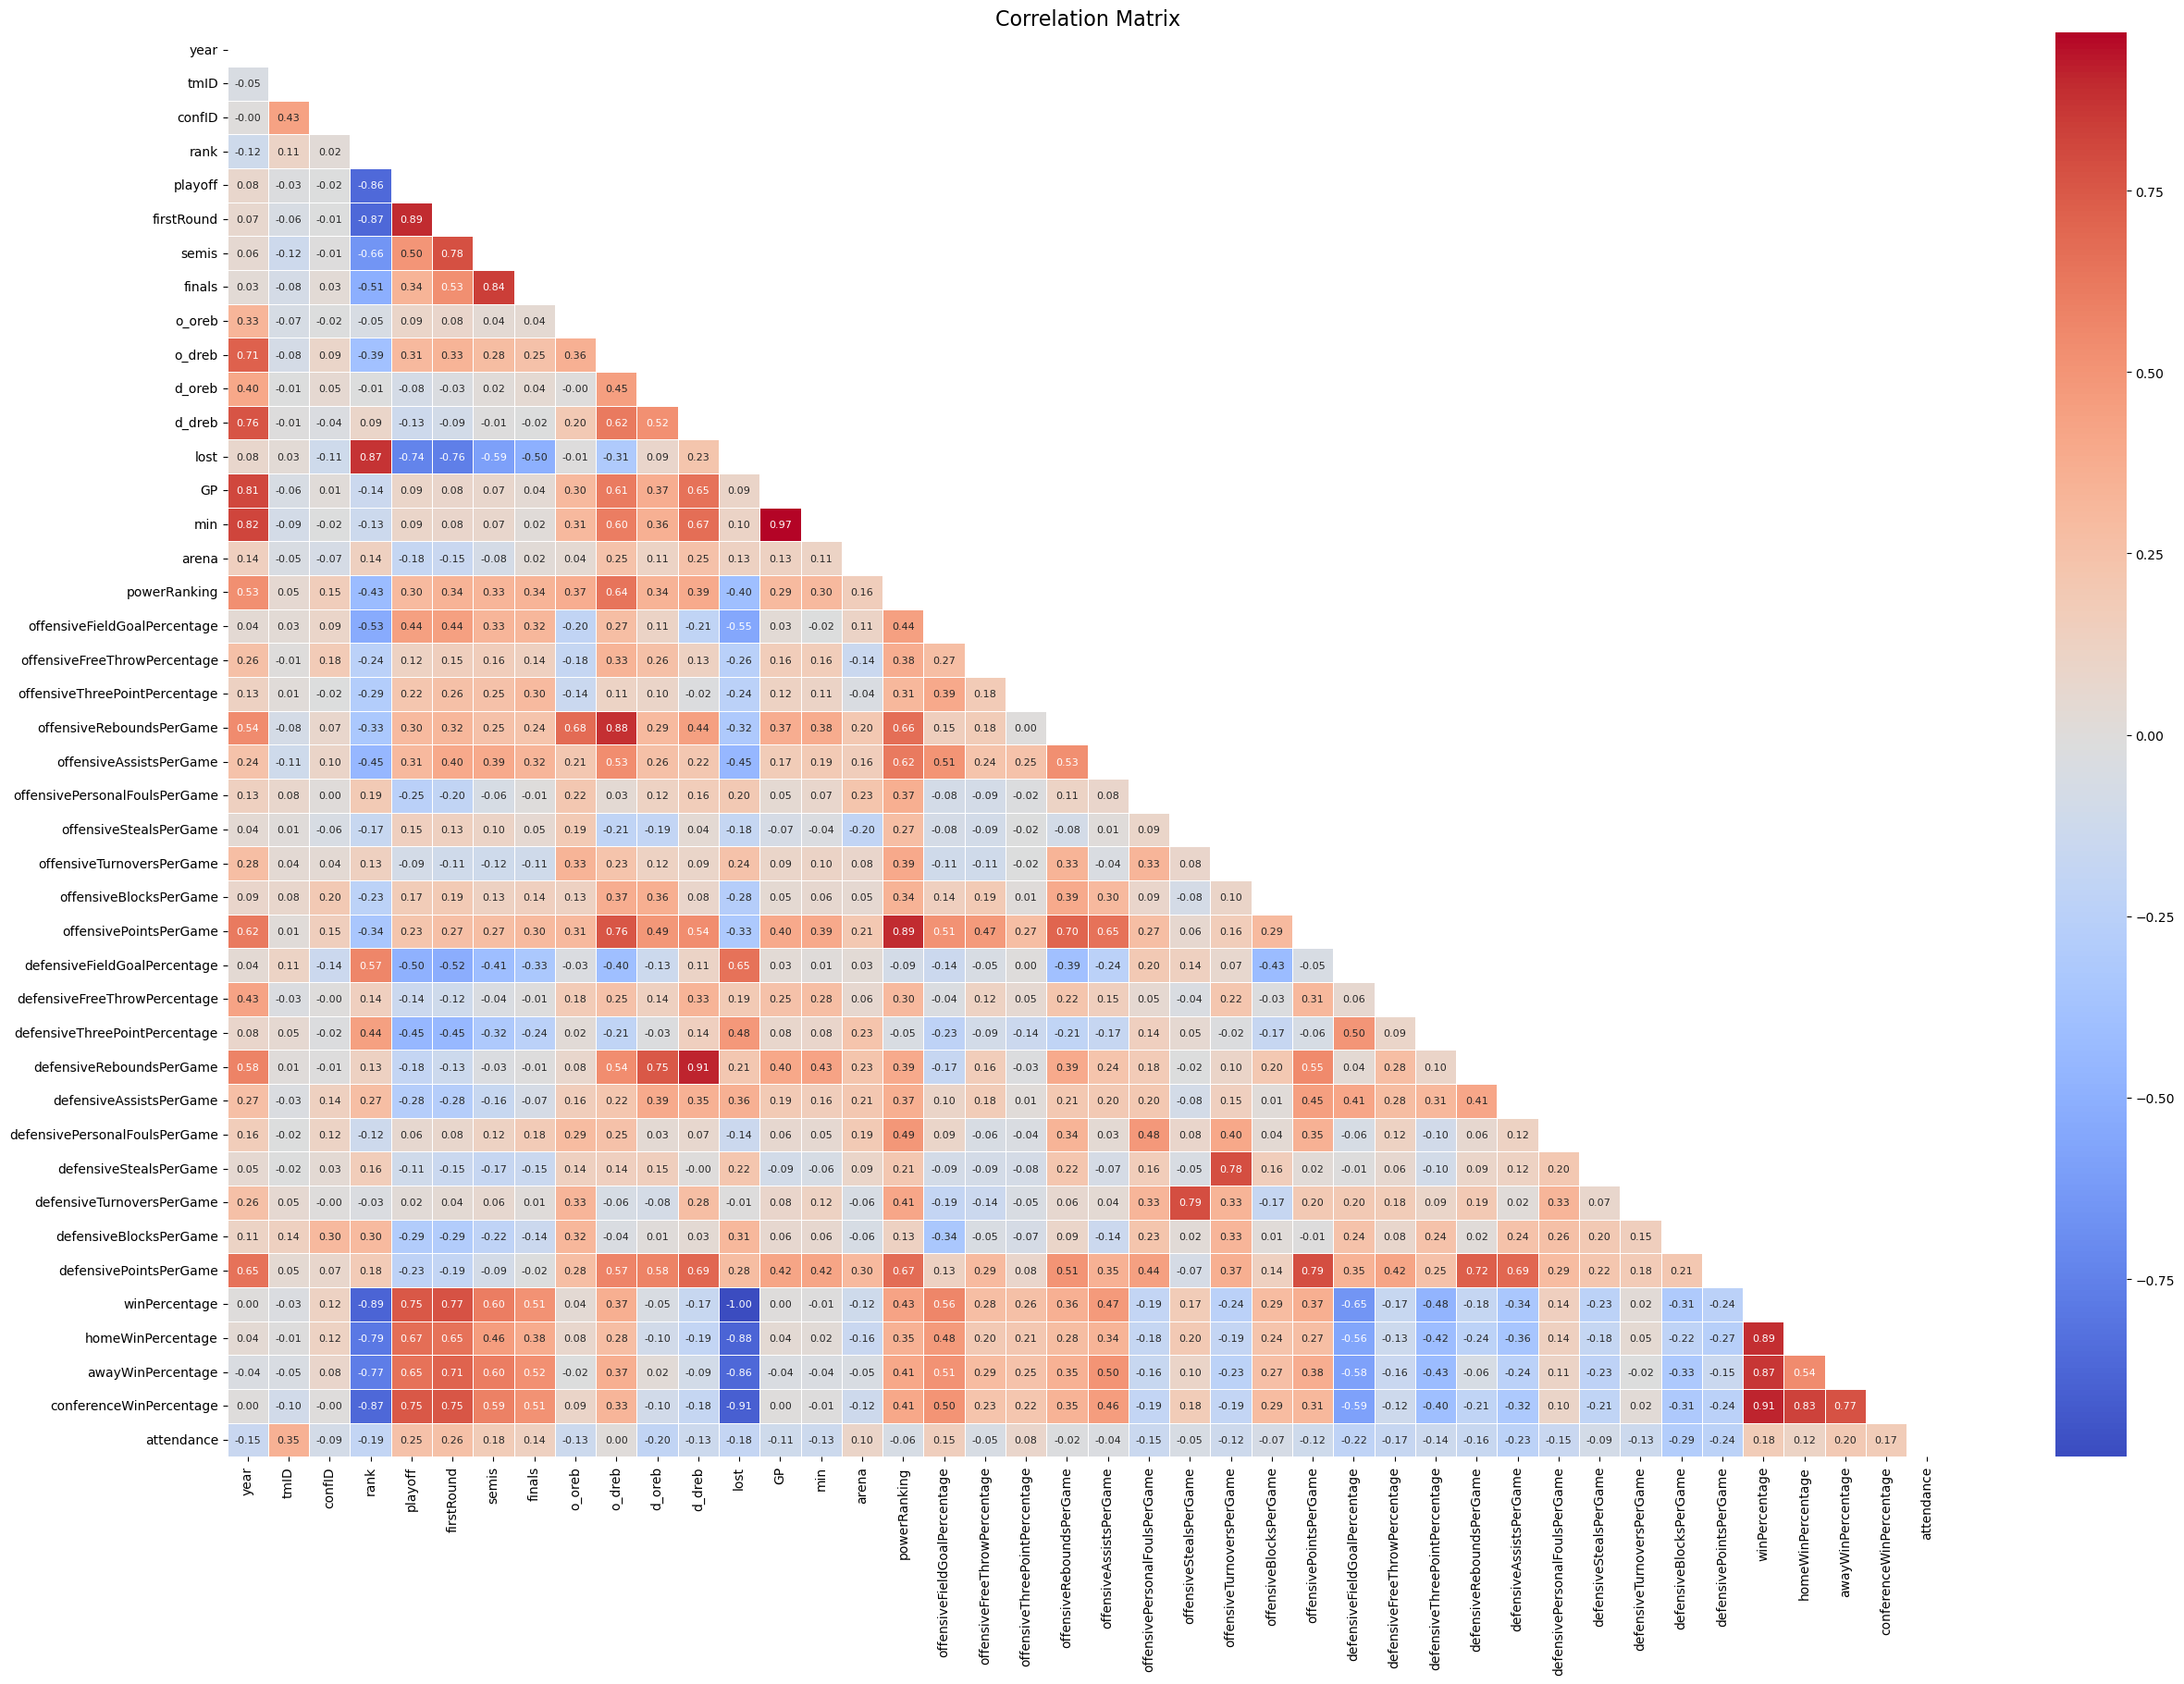

Correlation between target and year: 0.07705063246068848
Correlation between target and tmID: -0.02529934329892212
Correlation between target and confID: -0.016000512024577127
Correlation between target and rank: -0.8620790896686981
Correlation between target and playoff: 1.0
Correlation between target and firstRound: 0.892828570971414
Correlation between target and semis: 0.4970630193302927
Correlation between target and finals: 0.336817912482514
Correlation between target and o_oreb: 0.0923630258772151
Correlation between target and o_dreb: 0.30755716728105326
Correlation between target and d_oreb: -0.07564183752103998
Correlation between target and d_dreb: -0.12850329846395211
Correlation between target and lost: -0.7381220473270342
Correlation between target and GP: 0.09131841461785487
Correlation between target and min: 0.08789020587498408
Correlation between target and arena: -0.1780682469131567
Correlation between target and powerRanking: 0.29787725132213844
Correlation between 

In [518]:
team1 = teams

for index, team in team1.iterrows(): 
    powerRanking = team_power_ranking(team)

    team1.at[index, 'powerRanking'] = powerRanking[0]
    team1.at[index, 'offensiveFieldGoalPercentage'] = powerRanking[1]
    team1.at[index, 'offensiveFreeThrowPercentage'] = powerRanking[2]
    team1.at[index, 'offensiveThreePointPercentage'] = powerRanking[3]
    team1.at[index, 'offensiveReboundsPerGame'] = powerRanking[4]
    team1.at[index, 'offensiveAssistsPerGame'] = powerRanking[5]
    team1.at[index, 'offensivePersonalFoulsPerGame'] = powerRanking[6]
    team1.at[index, 'offensiveStealsPerGame'] = powerRanking[7]
    team1.at[index, 'offensiveTurnoversPerGame'] = powerRanking[8]
    team1.at[index, 'offensiveBlocksPerGame'] = powerRanking[9]
    team1.at[index, 'offensivePointsPerGame'] = powerRanking[10]
    team1.at[index, 'defensiveFieldGoalPercentage'] = powerRanking[11]
    team1.at[index, 'defensiveFreeThrowPercentage'] = powerRanking[12]
    team1.at[index, 'defensiveThreePointPercentage'] = powerRanking[13]
    team1.at[index, 'defensiveReboundsPerGame'] = powerRanking[14]
    team1.at[index, 'defensiveAssistsPerGame'] = powerRanking[15]
    team1.at[index, 'defensivePersonalFoulsPerGame'] = powerRanking[16]
    team1.at[index, 'defensiveStealsPerGame'] = powerRanking[17]
    team1.at[index, 'defensiveTurnoversPerGame'] = powerRanking[18]
    team1.at[index, 'defensiveBlocksPerGame'] = powerRanking[19]
    team1.at[index, 'defensivePointsPerGame'] = powerRanking[20]
    team1.at[index, 'winPercentage'] = powerRanking[21]
    team1.at[index, 'homeWinPercentage'] = powerRanking[22]
    team1.at[index, 'awayWinPercentage'] = powerRanking[23]
    team1.at[index, 'conferenceWinPercentage'] = powerRanking[24]
    team1.at[index, 'attendance'] = powerRanking[25]


team1 = team1.drop(columns=['o_fgm', 'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa', 'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts', 'won', 'homeW', 'homeL', 'awayW', 'awayL', 'confW', 'confL', 'attend'])
team1 = team1.drop(columns=['lgID', 'divID', 'seeded', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB'])
team1.to_csv('team1.csv', index=False)

features_weight = correlation_matrix(team1)

Based on the correlation matrix values, lets refine team power ranking and observe the difference. 

In [519]:
def team_power_ranking_2(team, variables_weight): 

    # offensive stats
    offensiveFieldGoalPercentage = (team['o_fgm'] / team['o_fga']) * 100
    offensiveFieldGoalPercentage = (offensiveFieldGoalPercentage - offensiveFieldGoalPercentageMin) / (offensiveFieldGoalPercentageMax - offensiveFieldGoalPercentageMin) * 100

    offensiveFreeThrowPercentage = (team['o_ftm'] / team['o_fta']) * 100
    offensiveFreeThrowPercentage = (offensiveFreeThrowPercentage - offensiveFreeThrowPercentageMin) / (offensiveFreeThrowPercentageMax - offensiveFreeThrowPercentageMin) * 100

    offensiveThreePointPercentage = (team['o_3pm'] / team['o_3pa']) * 100
    offensiveThreePointPercentage = (offensiveThreePointPercentage - offensiveThreePointPercentageMin) / (offensiveThreePointPercentageMax - offensiveThreePointPercentageMin) * 100

    offensiveReboundsPerGame = team['o_reb'] / team['GP']
    offensiveReboundsPerGame = (offensiveReboundsPerGame - offensiveReboundsPerGameMin) / (offensiveReboundsPerGameMax - offensiveReboundsPerGameMin) * 100

    offensiveAssistsPerGame = team['o_asts'] / team['GP']
    offensiveAssistsPerGame = (offensiveAssistsPerGame - offensiveAssistsPerGameMin) / (offensiveAssistsPerGameMax - offensiveAssistsPerGameMin) * 100

    offensivePersonalFoulsPerGame = team['o_pf'] / team['GP']
    offensivePersonalFoulsPerGame = (offensivePersonalFoulsPerGame - offensivePersonalFoulsPerGameMin) / (offensivePersonalFoulsPerGameMax - offensivePersonalFoulsPerGameMin) * 100

    offensiveStealsPerGame = team['o_stl'] / team['GP']
    offensiveStealsPerGame = (offensiveStealsPerGame - offensiveStealsPerGameMin) / (offensiveStealsPerGameMax - offensiveStealsPerGameMin) * 100

    offensiveTurnoversPerGame = team['o_to'] / team['GP']
    offensiveTurnoversPerGame = (offensiveTurnoversPerGame - offensiveTurnoversPerGameMin) / (offensiveTurnoversPerGameMax - offensiveTurnoversPerGameMin) * 100

    offensiveBlocksPerGame = team['o_blk'] / team['GP']
    offensiveBlocksPerGame = (offensiveBlocksPerGame - offensiveBlocksPerGameMin) / (offensiveBlocksPerGameMax - offensiveBlocksPerGameMin) * 100

    offensivePointsPerGame = team['o_pts'] / team['GP']
    offensivePointsPerGame = (offensivePointsPerGame - offensivePointsPerGameMin) / (offensivePointsPerGameMax - offensivePointsPerGameMin) * 100

    # defensive stats
    defensiveFieldGoalPercentage = (team['d_fgm'] / team['d_fga']) * 100
    defensiveFieldGoalPercentage = (defensiveFieldGoalPercentage - defensiveFieldGoalPercentageMin) / (defensiveFieldGoalPercentageMax - defensiveFieldGoalPercentageMin) * 100

    defensiveFreeThrowPercentage = (team['d_ftm'] / team['d_fta']) * 100
    defensiveFreeThrowPercentage = (defensiveFreeThrowPercentage - defensiveFreeThrowPercentageMin) / (defensiveFreeThrowPercentageMax - defensiveFreeThrowPercentageMin) * 100

    defensiveThreePointPercentage = (team['d_3pm'] / team['d_3pa']) * 100
    defensiveThreePointPercentage = (defensiveThreePointPercentage - defensiveThreePointPercentageMin) / (defensiveThreePointPercentageMax - defensiveThreePointPercentageMin) * 100

    defensiveReboundsPerGame = team['d_reb'] / team['GP']
    defensiveReboundsPerGame = (defensiveReboundsPerGame - defensiveReboundsPerGameMin) / (defensiveReboundsPerGameMax - defensiveReboundsPerGameMin) * 100

    defensiveAssistsPerGame = team['d_asts'] / team['GP']
    defensiveAssistsPerGame = (defensiveAssistsPerGame - defensiveAssistsPerGameMin) / (defensiveAssistsPerGameMax - defensiveAssistsPerGameMin) * 100

    defensivePersonalFoulsPerGame = team['d_pf'] / team['GP']
    defensivePersonalFoulsPerGame = (defensivePersonalFoulsPerGame - defensivePersonalFoulsPerGameMin) / (defensivePersonalFoulsPerGameMax - defensivePersonalFoulsPerGameMin) * 100

    defensiveStealsPerGame = team['d_stl'] / team['GP']
    defensiveStealsPerGame = (defensiveStealsPerGame - defensiveStealsPerGameMin) / (defensiveStealsPerGameMax - defensiveStealsPerGameMin) * 100

    defensiveTurnoversPerGame = team['d_to'] / team['GP']
    defensiveTurnoversPerGame = (defensiveTurnoversPerGame - defensiveTurnoversPerGameMin) / (defensiveTurnoversPerGameMax - defensiveTurnoversPerGameMin) * 100

    defensiveBlocksPerGame = team['d_blk'] / team['GP']
    defensiveBlocksPerGame = (defensiveBlocksPerGame - defensiveBlocksPerGameMin) / (defensiveBlocksPerGameMax - defensiveBlocksPerGameMin) * 100

    defensivePointsPerGame = team['d_pts'] / team['GP']
    defensivePointsPerGame = (defensivePointsPerGame - defensivePointsPerGameMin) / (defensivePointsPerGameMax - defensivePointsPerGameMin) * 100

    # global stats
    winPercentage = team['won'] / team['GP'] * 100
    winPercentage = (winPercentage - winPercentageMin) / (winPercentageMax - winPercentageMin) * 100

    homeWinPercentage = team['homeW'] / (team['homeW'] + team['homeL']) * 100
    homeWinPercentage = (homeWinPercentage - homeWinPercentageMin) / (homeWinPercentageMax - homeWinPercentageMin) * 100

    awayWinPercentage = team['awayW'] / (team['awayW'] + team['awayL']) * 100
    awayWinPercentage = (awayWinPercentage - awayWinPercentageMin) / (awayWinPercentageMax - awayWinPercentageMin) * 100

    conferenceWinPercentage = team['confW'] / (team['confW'] + team['confL']) * 100
    conferenceWinPercentage = (conferenceWinPercentage - conferenceWinPercentageMin) / (conferenceWinPercentageMax - conferenceWinPercentageMin) * 100

    attendance = (team['attend'] - attendanceMin) / (attendanceMax - attendanceMin) * 100

    relevantFeatures = {'offensiveFieldGoalPercentage': offensiveFieldGoalPercentage,
        'offensiveFreeThrowPercentage': offensiveFreeThrowPercentage,
        'offensiveThreePointPercentage': offensiveThreePointPercentage,
        'offensiveReboundsPerGame': offensiveReboundsPerGame,
        'offensiveAssistsPerGame': offensiveAssistsPerGame,
        'offensivePersonalFoulsPerGame': offensivePersonalFoulsPerGame,
        'offensiveStealsPerGame': offensiveStealsPerGame,
        'offensiveTurnoversPerGame': offensiveTurnoversPerGame,
        'offensiveBlocksPerGame': offensiveBlocksPerGame,
        'offensivePointsPerGame': offensivePointsPerGame,
        'defensiveFieldGoalPercentage': defensiveFieldGoalPercentage,
        'defensiveFreeThrowPercentage': defensiveFreeThrowPercentage,
        'defensiveThreePointPercentage': defensiveThreePointPercentage,
        'defensiveReboundsPerGame': defensiveReboundsPerGame,
        'defensiveAssistsPerGame': defensiveAssistsPerGame,
        'defensivePersonalFoulsPerGame': defensivePersonalFoulsPerGame,
        'defensiveStealsPerGame': defensiveStealsPerGame,
        'defensiveTurnoversPerGame': defensiveTurnoversPerGame,
        'defensiveBlocksPerGame': defensiveBlocksPerGame,
        'defensivePointsPerGame': defensivePointsPerGame,
        'winPercentage': winPercentage,
        'homeWinPercentage': homeWinPercentage,
        'awayWinPercentage': awayWinPercentage,
        'conferenceWinPercentage': conferenceWinPercentage,
        'attendance': attendance
    }

    powerRankingAccumulator = 0

    for feature_name, feature_value in relevantFeatures.items():
        powerRankingAccumulator += feature_value * float(variables_weight[feature_name])

    relevantFeatures['powerRanking2'] = powerRankingAccumulator

    return relevantFeatures

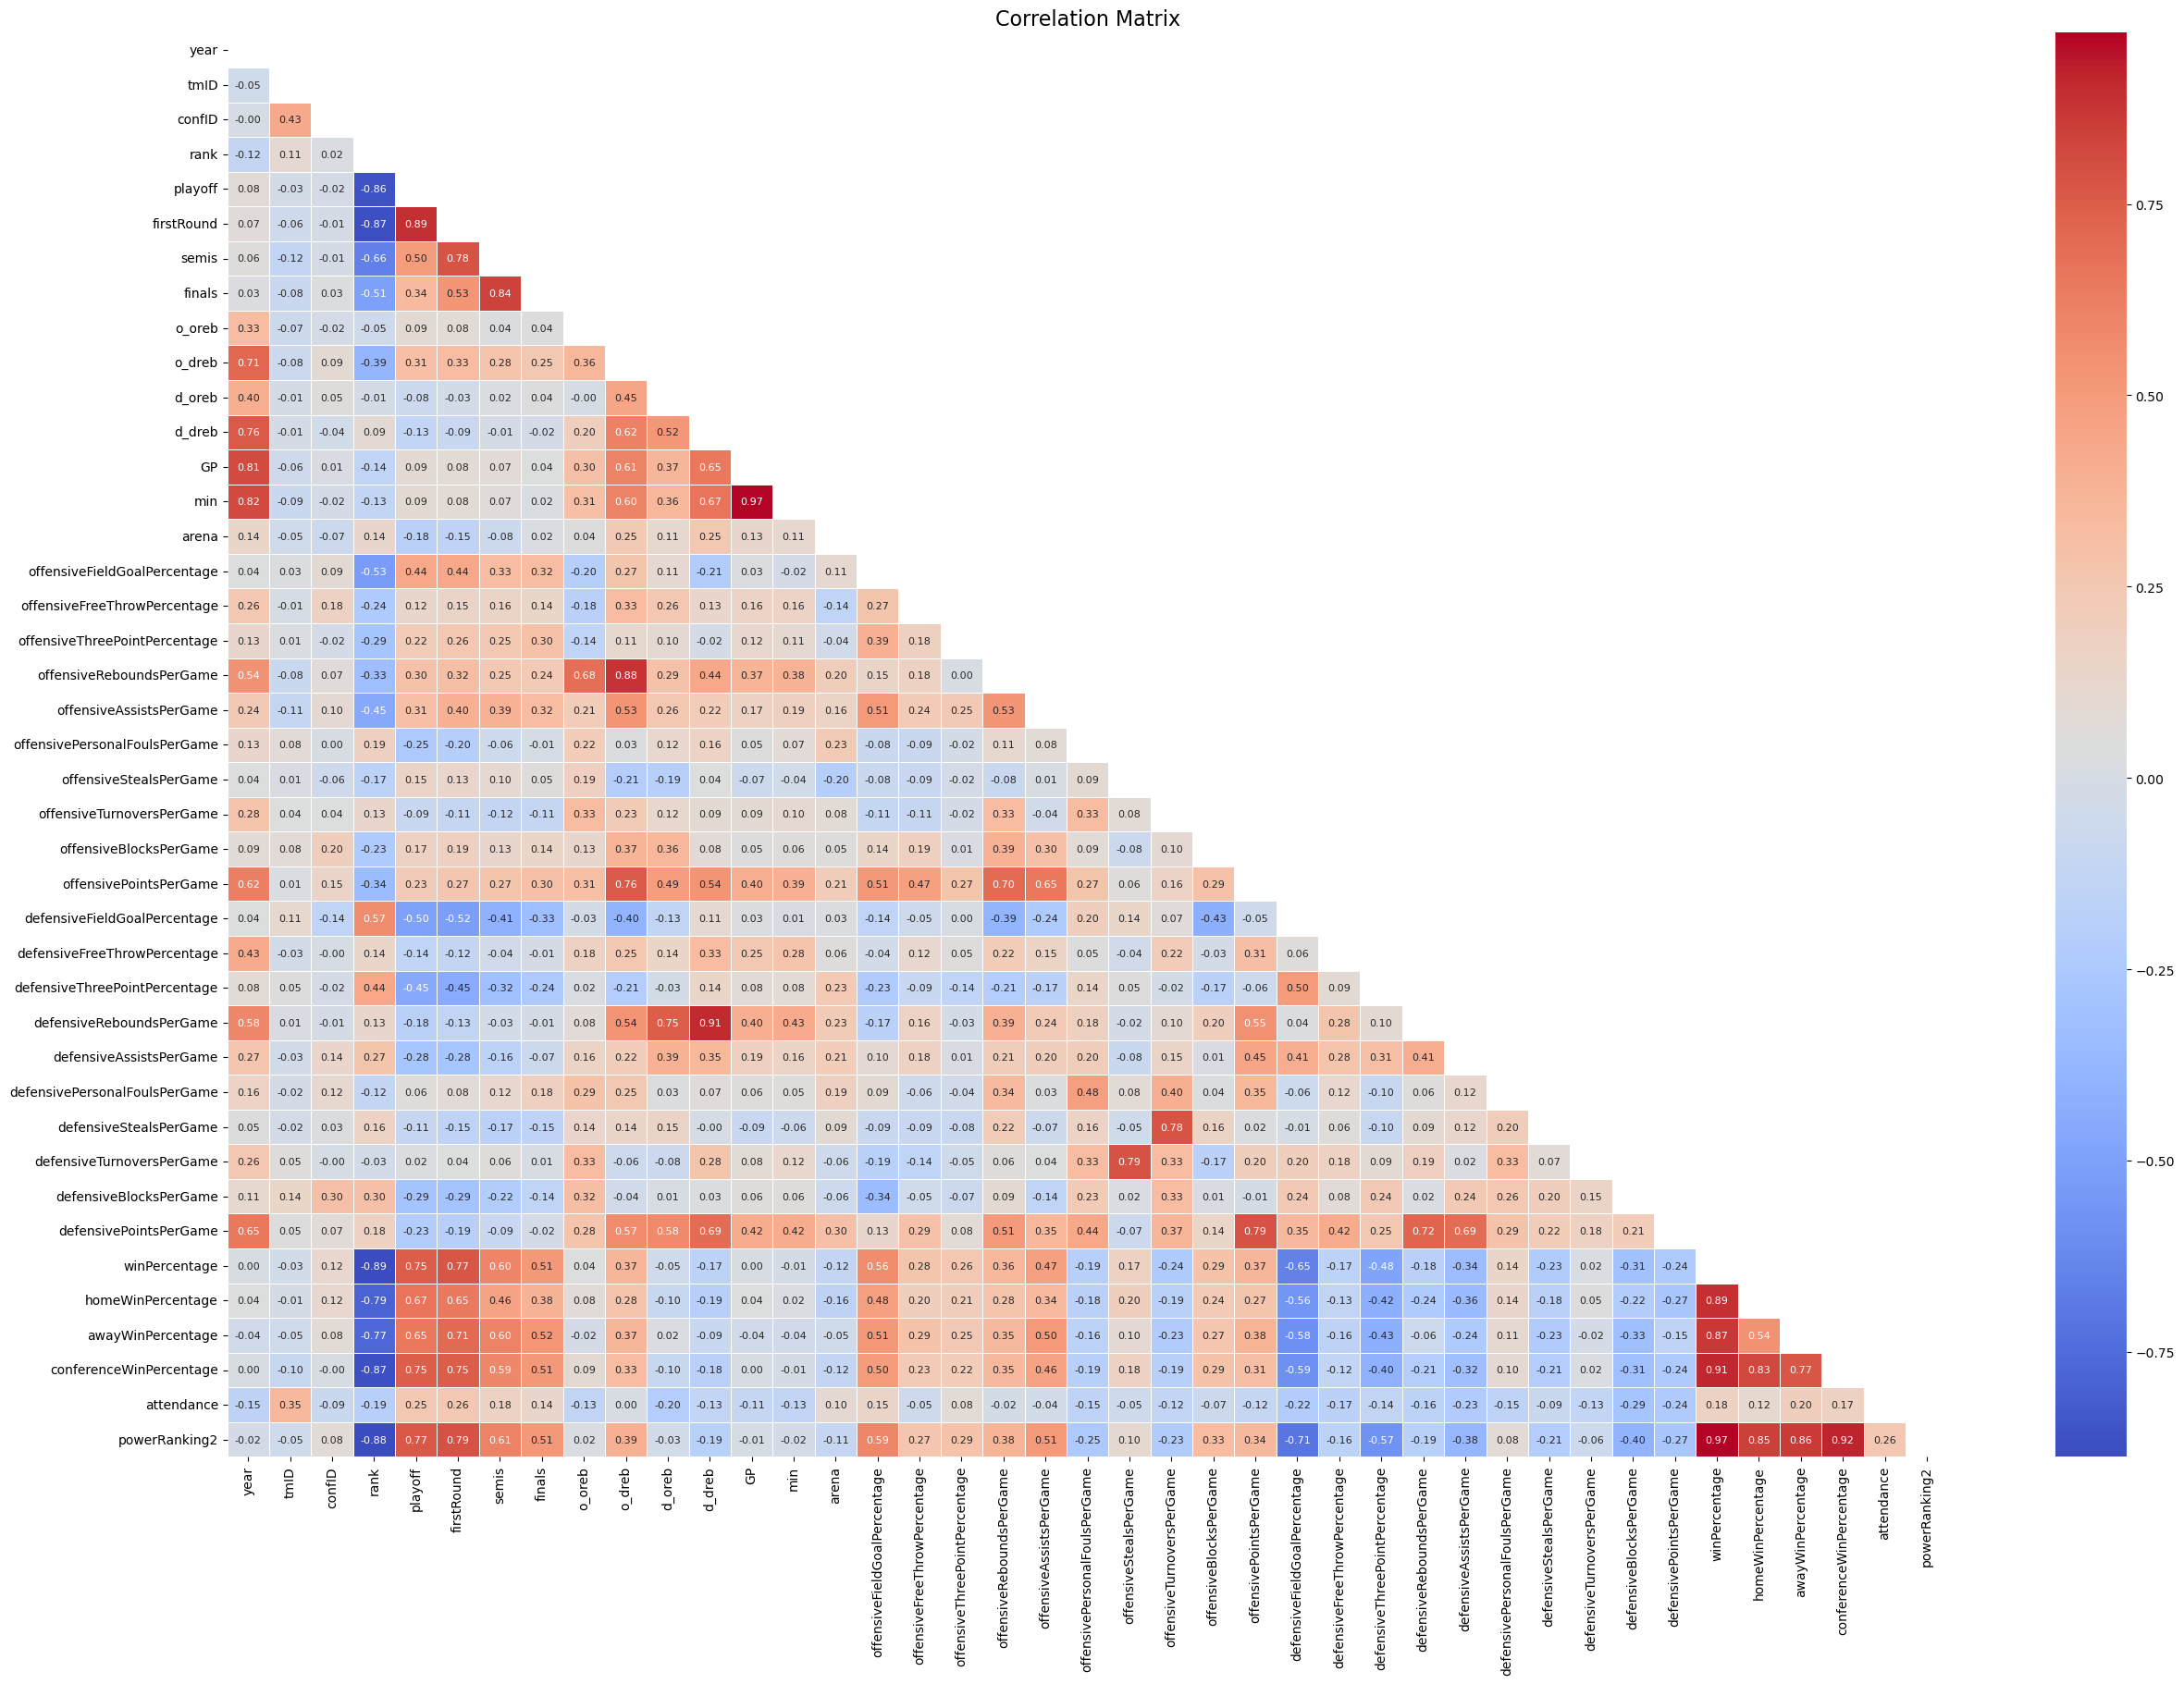

Correlation between target and year: 0.07705063246068848
Correlation between target and tmID: -0.02529934329892212
Correlation between target and confID: -0.016000512024577127
Correlation between target and rank: -0.8620790896686981
Correlation between target and playoff: 1.0
Correlation between target and firstRound: 0.892828570971414
Correlation between target and semis: 0.4970630193302927
Correlation between target and finals: 0.336817912482514
Correlation between target and o_oreb: 0.0923630258772151
Correlation between target and o_dreb: 0.30755716728105326
Correlation between target and d_oreb: -0.07564183752103998
Correlation between target and d_dreb: -0.12850329846395211
Correlation between target and GP: 0.09131841461785487
Correlation between target and min: 0.08789020587498408
Correlation between target and arena: -0.1780682469131567
Correlation between target and offensiveFieldGoalPercentage: 0.4393601131265843
Correlation between target and offensiveFreeThrowPercentage: 0

In [520]:
team2 = teams

for index, team in team2.iterrows(): 
    powerRanking = team_power_ranking_2(team, features_weight)

    team2.at[index, 'powerRanking2'] = powerRanking['powerRanking2']
    team2.at[index, 'offensiveFieldGoalPercentage'] = powerRanking['offensiveFieldGoalPercentage']
    team2.at[index, 'offensiveFreeThrowPercentage'] = powerRanking['offensiveFreeThrowPercentage']
    team2.at[index, 'offensiveThreePointPercentage'] = powerRanking['offensiveThreePointPercentage']
    team2.at[index, 'offensiveReboundsPerGame'] = powerRanking['offensiveReboundsPerGame']
    team2.at[index, 'offensiveAssistsPerGame'] = powerRanking['offensiveAssistsPerGame']
    team2.at[index, 'offensivePersonalFoulsPerGame'] = powerRanking['offensivePersonalFoulsPerGame']
    team2.at[index, 'offensiveStealsPerGame'] = powerRanking['offensiveStealsPerGame']
    team2.at[index, 'offensiveTurnoversPerGame'] = powerRanking['offensiveTurnoversPerGame']
    team2.at[index, 'offensiveBlocksPerGame'] = powerRanking['offensiveBlocksPerGame']
    team2.at[index, 'offensivePointsPerGame'] = powerRanking['offensivePointsPerGame']
    team2.at[index, 'defensiveFieldGoalPercentage'] = powerRanking['defensiveFieldGoalPercentage']
    team2.at[index, 'defensiveFreeThrowPercentage'] = powerRanking['defensiveFreeThrowPercentage']
    team2.at[index, 'defensiveThreePointPercentage'] = powerRanking['defensiveThreePointPercentage']
    team2.at[index, 'defensiveReboundsPerGame'] = powerRanking['defensiveReboundsPerGame']
    team2.at[index, 'defensiveAssistsPerGame'] = powerRanking['defensiveAssistsPerGame']
    team2.at[index, 'defensivePersonalFoulsPerGame'] = powerRanking['defensivePersonalFoulsPerGame']
    team2.at[index, 'defensiveStealsPerGame'] = powerRanking['defensiveStealsPerGame']
    team2.at[index, 'defensiveTurnoversPerGame'] = powerRanking['defensiveTurnoversPerGame']
    team2.at[index, 'defensiveBlocksPerGame'] = powerRanking['defensiveBlocksPerGame']
    team2.at[index, 'defensivePointsPerGame'] = powerRanking['defensivePointsPerGame']
    team2.at[index, 'winPercentage'] = powerRanking['winPercentage']
    team2.at[index, 'homeWinPercentage'] = powerRanking['homeWinPercentage']
    team2.at[index, 'awayWinPercentage'] = powerRanking['awayWinPercentage']
    team2.at[index, 'conferenceWinPercentage'] = powerRanking['conferenceWinPercentage']
    team2.at[index, 'attendance'] = powerRanking['attendance']


team2 = team2.drop(columns=['o_fgm', 'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa', 'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts', 'won', 'lost', 'homeW', 'homeL', 'awayW', 'awayL', 'confW', 'confL', 'attend', 'powerRanking'])
team2 = team2.drop(columns=['lgID', 'divID', 'seeded', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB'])
team2.to_csv('team2.csv', index=False)

features_weight = correlation_matrix(team2)

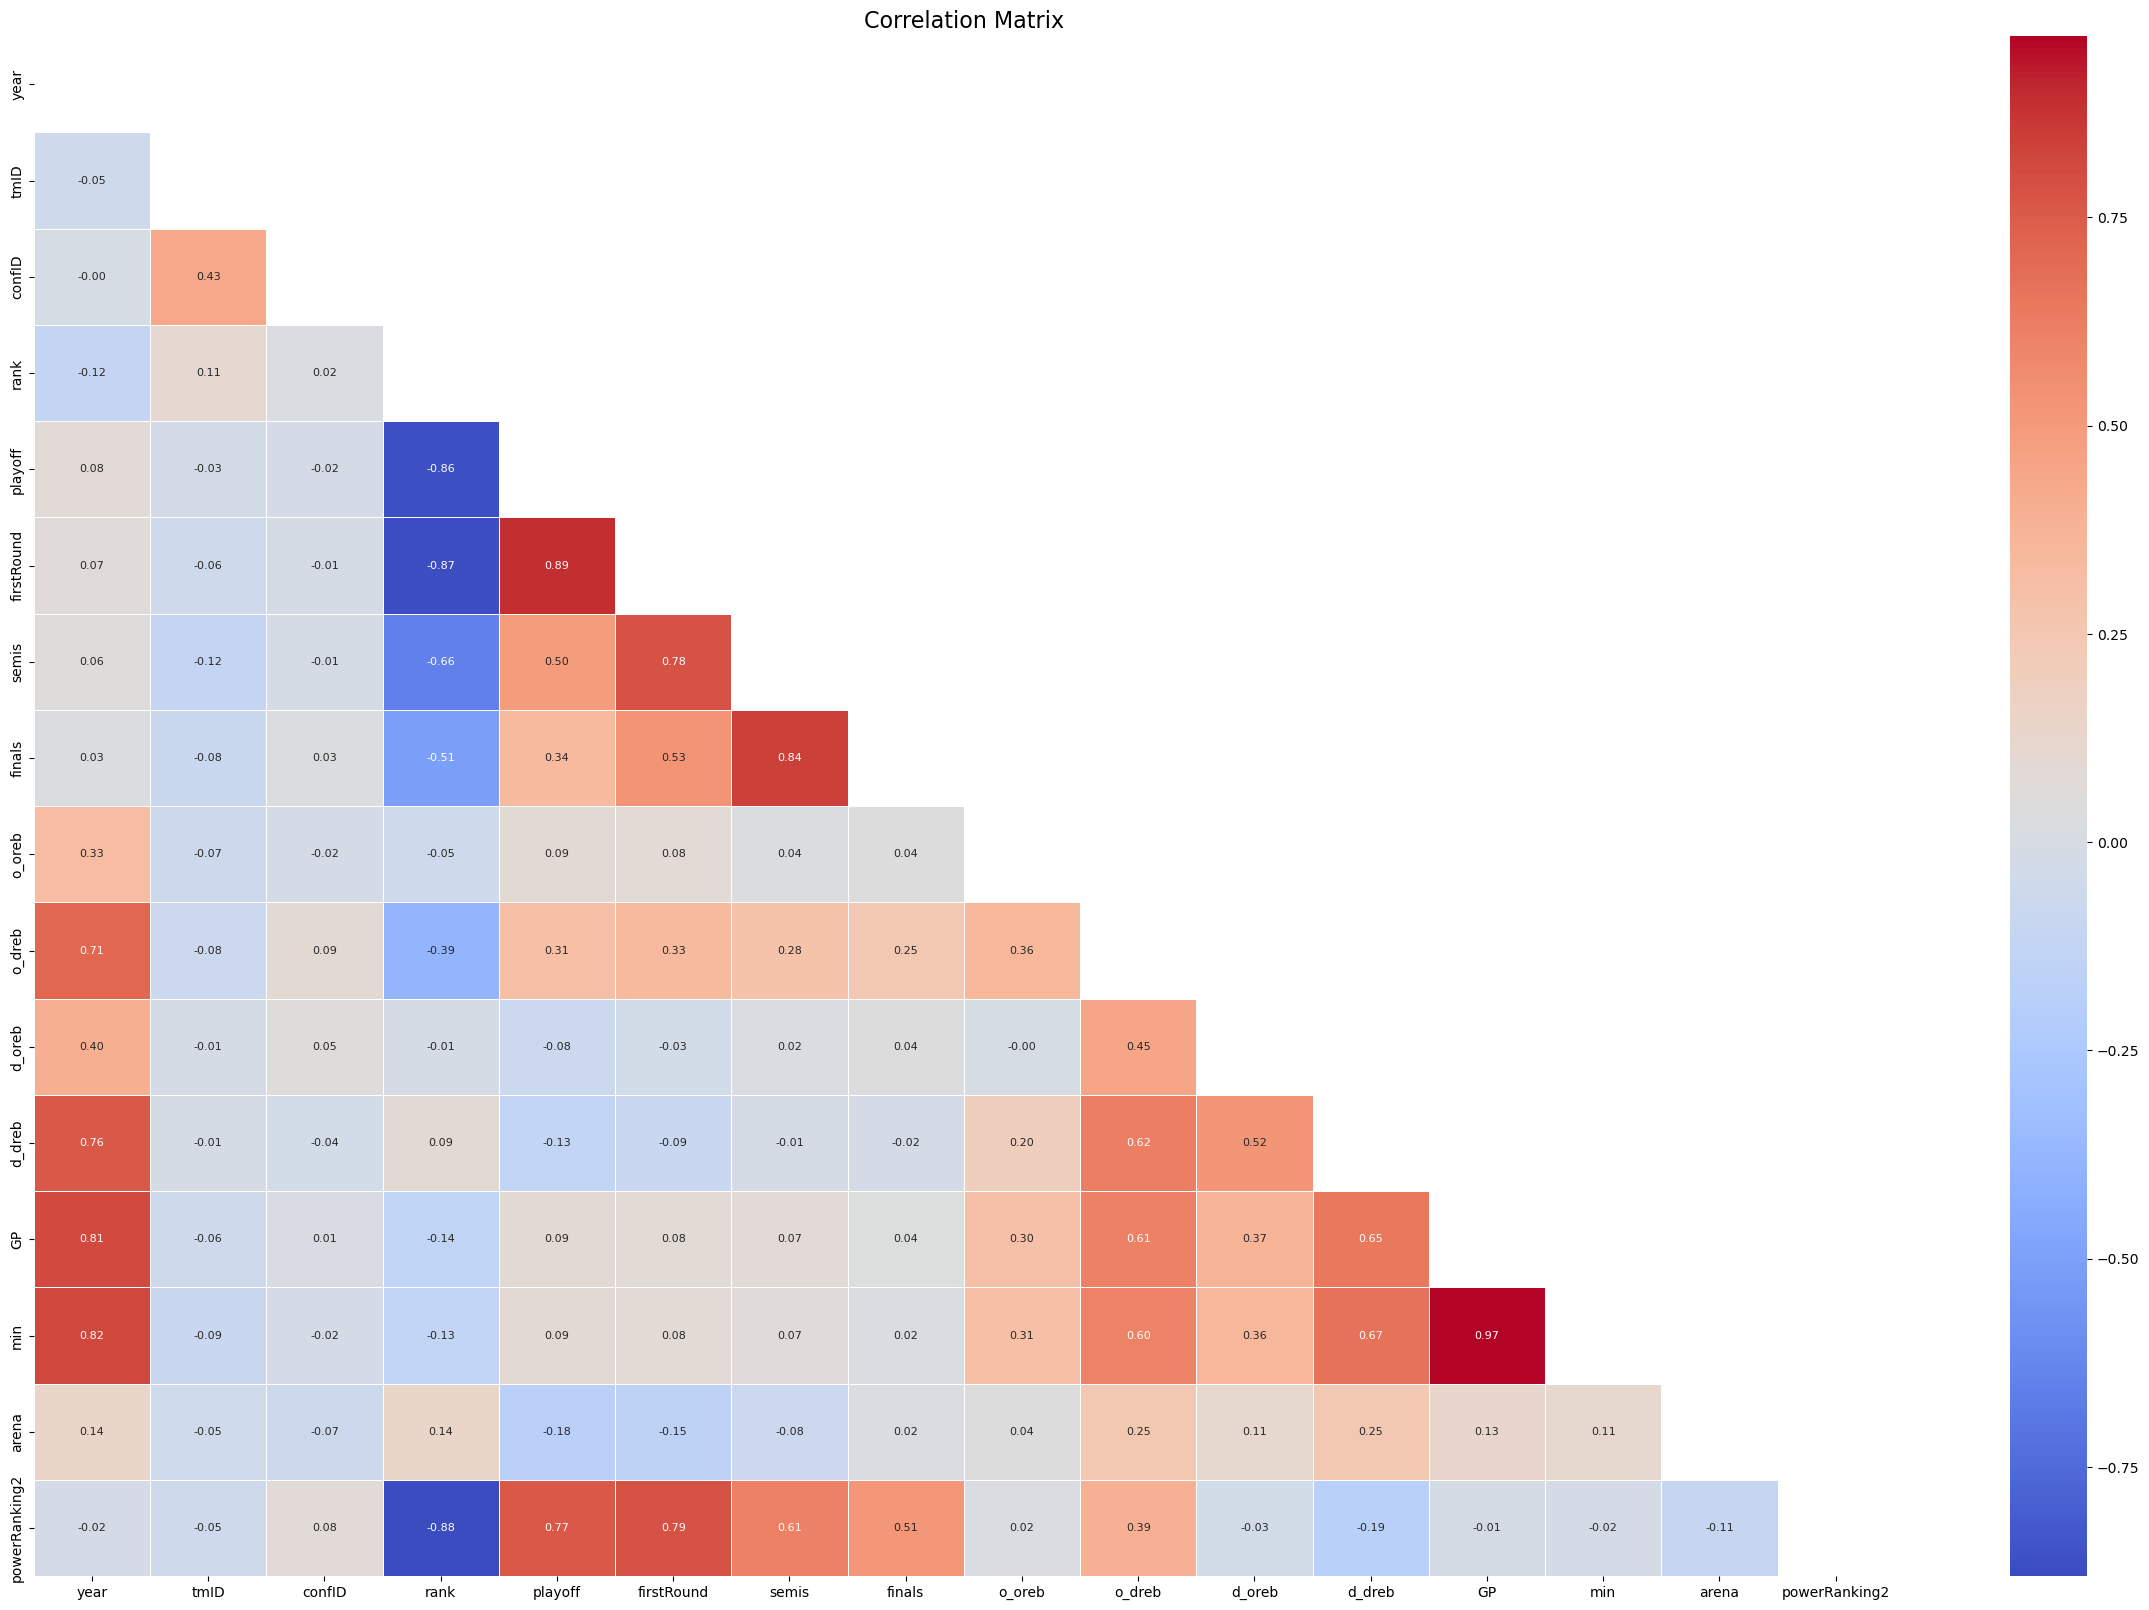

Correlation between target and year: 0.07705063246068848
Correlation between target and tmID: -0.02529934329892212
Correlation between target and confID: -0.016000512024577127
Correlation between target and rank: -0.8620790896686981
Correlation between target and playoff: 1.0
Correlation between target and firstRound: 0.892828570971414
Correlation between target and semis: 0.4970630193302927
Correlation between target and finals: 0.336817912482514
Correlation between target and o_oreb: 0.0923630258772151
Correlation between target and o_dreb: 0.30755716728105326
Correlation between target and d_oreb: -0.07564183752103998
Correlation between target and d_dreb: -0.12850329846395211
Correlation between target and GP: 0.09131841461785487
Correlation between target and min: 0.08789020587498408
Correlation between target and arena: -0.1780682469131567
Correlation between target and powerRanking2: 0.7651093804826924


{'year': 0.07705063246068848,
 'tmID': -0.02529934329892212,
 'confID': -0.016000512024577127,
 'rank': -0.8620790896686981,
 'playoff': 1.0,
 'firstRound': 0.892828570971414,
 'semis': 0.4970630193302927,
 'finals': 0.336817912482514,
 'o_oreb': 0.0923630258772151,
 'o_dreb': 0.30755716728105326,
 'd_oreb': -0.07564183752103998,
 'd_dreb': -0.12850329846395211,
 'GP': 0.09131841461785487,
 'min': 0.08789020587498408,
 'arena': -0.1780682469131567,
 'powerRanking2': 0.7651093804826924}

In [521]:
relevantFeatures = [ 'offensiveFieldGoalPercentage', 'offensiveFreeThrowPercentage', 'offensiveThreePointPercentage', 'offensiveReboundsPerGame', 'offensiveAssistsPerGame', 
                        'offensivePersonalFoulsPerGame', 'offensiveStealsPerGame', 'offensiveTurnoversPerGame', 'offensiveBlocksPerGame', 'offensivePointsPerGame', 
                        'defensiveFieldGoalPercentage', 'defensiveFreeThrowPercentage', 'defensiveThreePointPercentage', 'defensiveReboundsPerGame', 'defensiveAssistsPerGame', 
                        'defensivePersonalFoulsPerGame', 'defensiveStealsPerGame', 'defensiveTurnoversPerGame', 'defensiveBlocksPerGame', 'defensivePointsPerGame', 'winPercentage', 
                        'homeWinPercentage', 'awayWinPercentage', 'conferenceWinPercentage', 'attendance' ]

for feature in relevantFeatures:
    team2 = team2.drop(feature, axis=1)

correlation_matrix(team2)

Now we have a much shorter dataframe, but as we can see the relation between minutes and games played is really big, so we can delete games played. 

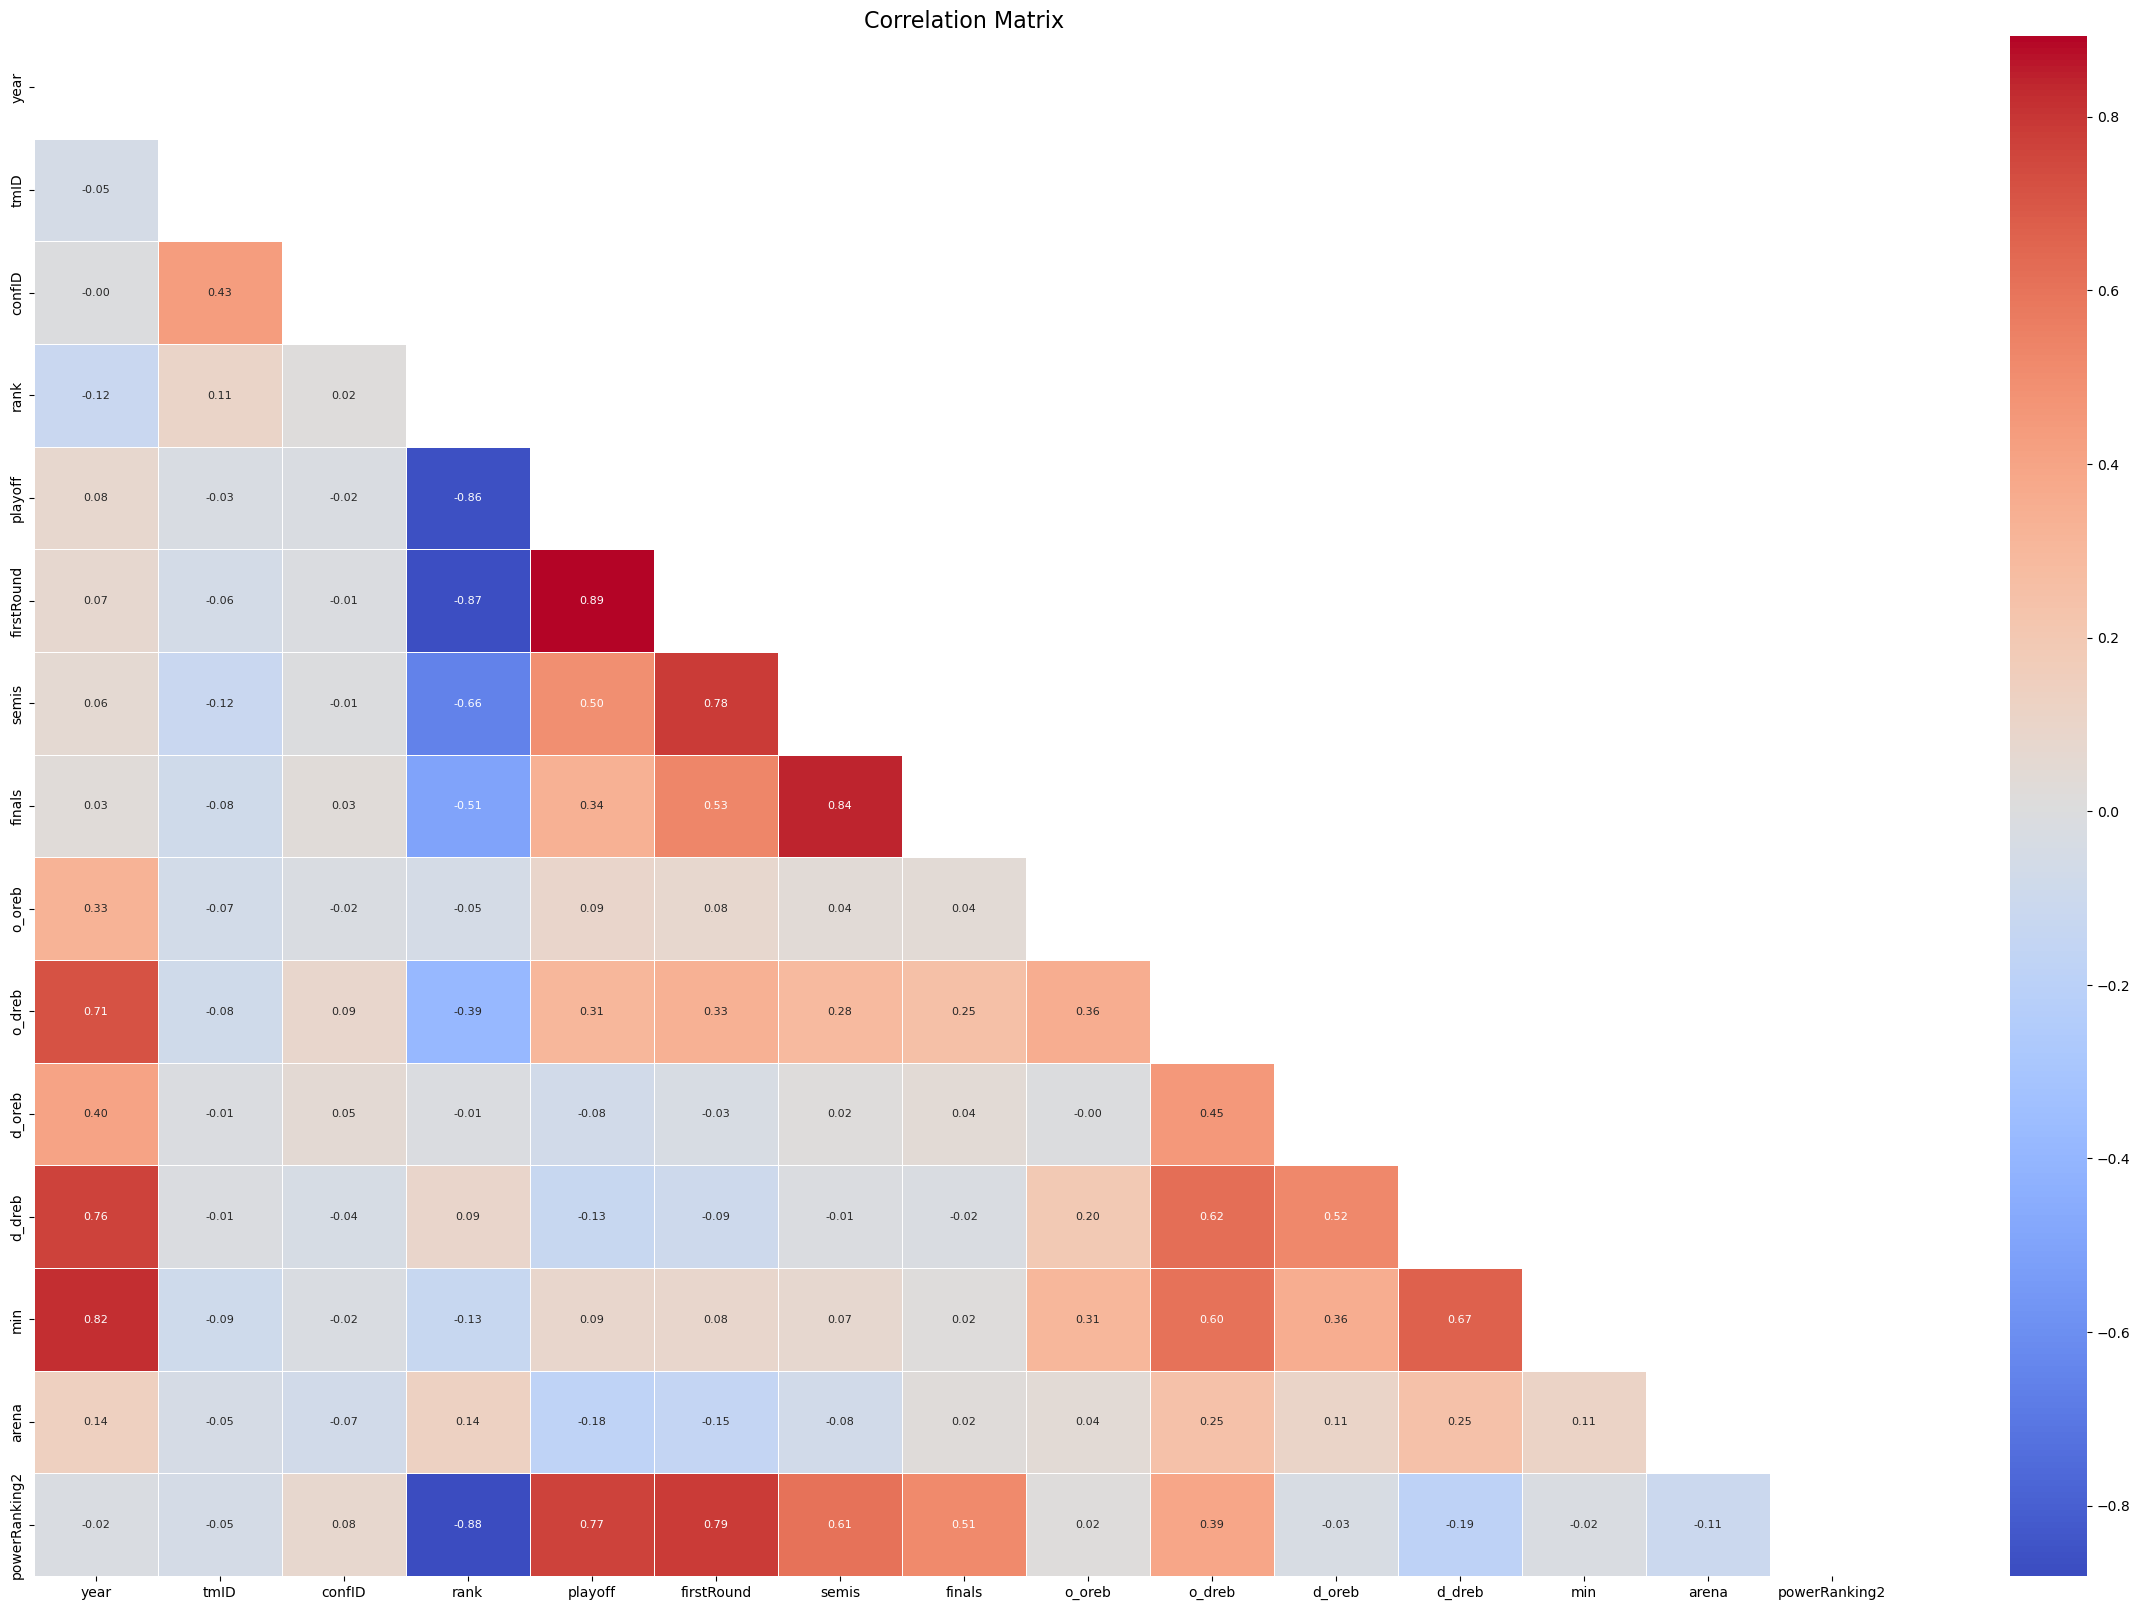

Correlation between target and year: 0.07705063246068848
Correlation between target and tmID: -0.02529934329892212
Correlation between target and confID: -0.016000512024577127
Correlation between target and rank: -0.8620790896686981
Correlation between target and playoff: 1.0
Correlation between target and firstRound: 0.892828570971414
Correlation between target and semis: 0.4970630193302927
Correlation between target and finals: 0.336817912482514
Correlation between target and o_oreb: 0.0923630258772151
Correlation between target and o_dreb: 0.30755716728105326
Correlation between target and d_oreb: -0.07564183752103998
Correlation between target and d_dreb: -0.12850329846395211
Correlation between target and min: 0.08789020587498408
Correlation between target and arena: -0.1780682469131567
Correlation between target and powerRanking2: 0.7651093804826924


{'year': 0.07705063246068848,
 'tmID': -0.02529934329892212,
 'confID': -0.016000512024577127,
 'rank': -0.8620790896686981,
 'playoff': 1.0,
 'firstRound': 0.892828570971414,
 'semis': 0.4970630193302927,
 'finals': 0.336817912482514,
 'o_oreb': 0.0923630258772151,
 'o_dreb': 0.30755716728105326,
 'd_oreb': -0.07564183752103998,
 'd_dreb': -0.12850329846395211,
 'min': 0.08789020587498408,
 'arena': -0.1780682469131567,
 'powerRanking2': 0.7651093804826924}

In [522]:
team2 = team2.drop('GP', axis=1)

correlation_matrix(team2)